In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.scale import FuncScale
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from google.cloud import bigquery


In [3]:
# df = pd.read_csv('../Zad1/results/mobility_covid_7_1.csv')
df = pd.read_csv('../Zad1/results/covid_5_1.csv')

In [58]:
df2 = pd.read_csv('../Zad1/results/world_covid_6_1.csv')

In [45]:
df2

,country_code,country_name,current_population,population_density,area_sq_km,current_gdp_usd,Rank,Capital,Continent,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate,World Population Percentage
0,AFG,Afghanistan,38928341,59.6270,652860,19101353832,37,Kabul,Asia,38972230,33753499,28189672,19542982,10694796,12486631,10752971,1.0257,0.52
1,ALB,Albania,2862427,99.6000,28750,15278077446,140,Tirana,Europe,2866849,2882481,2913399,3182021,3295066,2941651,2324731,0.9957,0.04
2,DZA,Algeria,43851043,18.4110,2381740,169988236398,33,Algiers,Africa,43451666,39543154,35856344,30774621,25518074,18739378,13795915,1.0164,0.56
3,ASM,American Samoa,55197,275.9850,200,636000000,210,Pago Pago,Oceania,46189,51368,54849,58230,47818,32886,27075,0.9831,0.00
4,AND,Andorra,77265,164.3940,470,3154057987,203,Andorra la Vella,Europe,77700,71746,71519,66097,53569,35611,19860,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,WLF,Wallis and Futuna,11246,80.3290,274,0,226,Mata-Utu,Oceania,11655,12182,13142,14723,13454,11315,9377,0.9953,0.00
230,ESH,Western Sahara,575986,2.1654,266000,0,171,El Aaiún,Africa,556048,491824,413296,270375,178529,116775,76371,1.0184,0.01
231,YEM,Yemen,29825968,56.4920,527970,27591261663,47,Sanaa,Asia,32284046,28516545,24743946,18628700,13375121,9204938,6843607,1.0217,0.42
232,ZMB,Zambia,18383956,24.7300,752610,23064722446,64,Lusaka,Africa,18927715,16248230,13792086,9891136,7686401,5720438,4281671,1.0280,0.25


In [46]:
df2 = df2[df2['country_name'].isin(df['country_name'])]

In [47]:
df2

,country_code,country_name,current_population,population_density,area_sq_km,current_gdp_usd,Rank,Capital,Continent,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate,World Population Percentage
0,AFG,Afghanistan,38928341,59.627,652860,19101353832,37,Kabul,Asia,38972230,33753499,28189672,19542982,10694796,12486631,10752971,1.0257,0.52
1,ALB,Albania,2862427,99.600,28750,15278077446,140,Tirana,Europe,2866849,2882481,2913399,3182021,3295066,2941651,2324731,0.9957,0.04
2,DZA,Algeria,43851043,18.411,2381740,169988236398,33,Algiers,Africa,43451666,39543154,35856344,30774621,25518074,18739378,13795915,1.0164,0.56
3,ASM,American Samoa,55197,275.985,200,636000000,210,Pago Pago,Oceania,46189,51368,54849,58230,47818,32886,27075,0.9831,0.00
4,AND,Andorra,77265,164.394,470,3154057987,203,Andorra la Vella,Europe,77700,71746,71519,66097,53569,35611,19860,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,VNM,Vietnam,97338583,313.925,331230,261921244843,15,Hanoi,Asia,96648685,92191398,87411012,79001142,66912613,52968270,41928849,1.0074,1.23
229,WLF,Wallis and Futuna,11246,80.329,274,0,226,Mata-Utu,Oceania,11655,12182,13142,14723,13454,11315,9377,0.9953,0.00
231,YEM,Yemen,29825968,56.492,527970,27591261663,47,Sanaa,Asia,32284046,28516545,24743946,18628700,13375121,9204938,6843607,1.0217,0.42
232,ZMB,Zambia,18383956,24.730,752610,23064722446,64,Lusaka,Africa,18927715,16248230,13792086,9891136,7686401,5720438,4281671,1.0280,0.25


In [8]:
df

,date,country_name,new_confirmed,cumulative_confirmed,new_deceased,cumulative_persons_vaccinated,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_persons_fully_vaccinated,vaccination_rate,population,population_density,fatality_rate,cumulative_deceased
0,2020-01-01,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
1,2020-01-02,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
2,2020-01-03,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
3,2020-01-04,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
4,2020-01-05,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228916,2022-09-13,Zimbabwe,0,256939,0,0,0,0,0,0.0,14862927,38.420,0.037651,5596
228917,2022-09-14,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0
228918,2022-09-15,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0
228919,2022-09-16,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0


## Część pierwsza.


### 1.1 New Confirmed Cases

In [72]:
flierprops = {
    'marker': 'o',
    'color': 'blue',
    'markersize': 4,
    'markerfacecolor': 'red',
    'linestyle': 'none'
}

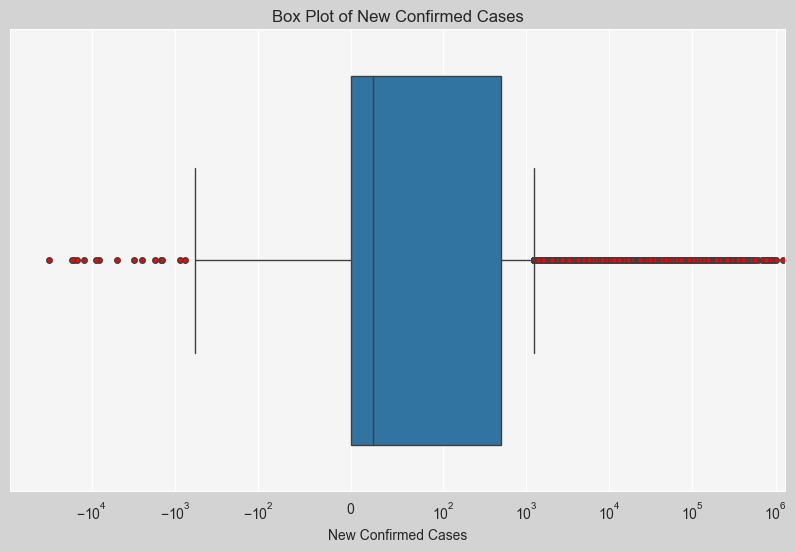

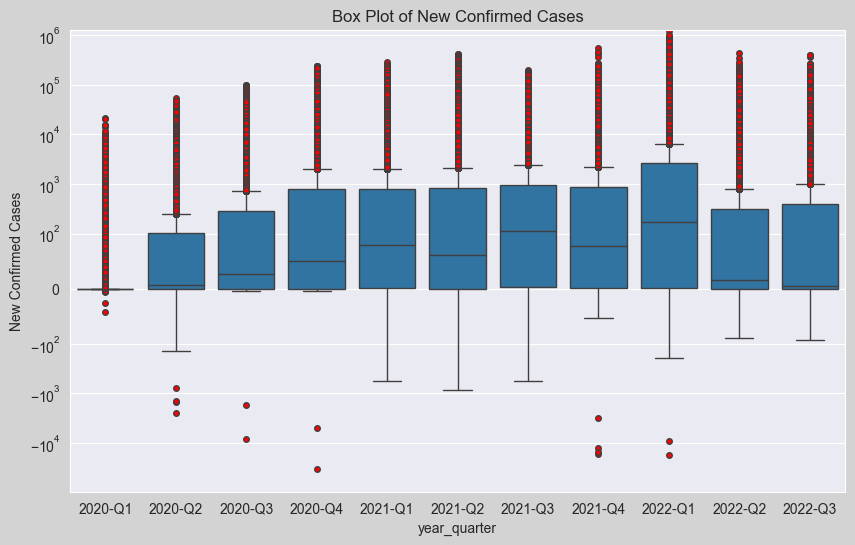

In [76]:
df['year_quarter'] = df['date'].dt.year.astype(str) + '-Q' + df['date'].dt.quarter.astype(str)

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='new_confirmed' ,data=df, flierprops = flierprops)
ax.set_xscale('symlog',linthresh =100)
plt.title('Box Plot of New Confirmed Cases')
plt.xlabel('New Confirmed Cases')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

sns.boxplot(y='new_confirmed',  x='year_quarter' ,data=df, flierprops = flierprops)
ax.set_yscale('symlog',linthresh =100)
plt.title('Box Plot of New Confirmed Cases')
plt.ylabel('New Confirmed Cases')
plt.show()



### 1.2 New Deceased

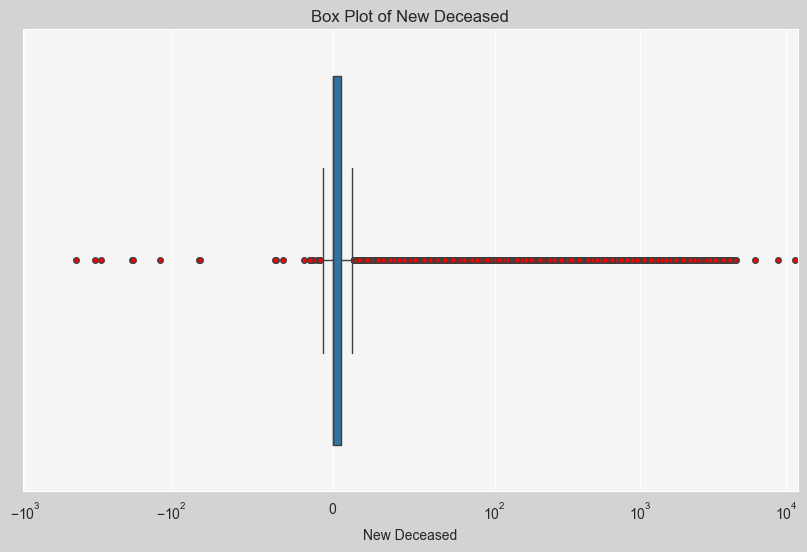

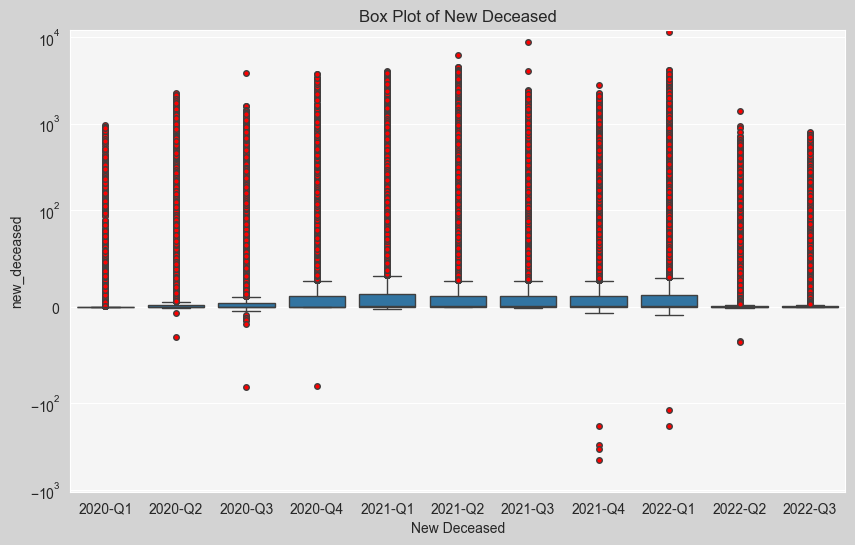

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='new_deceased' ,data=df, flierprops = flierprops)
ax.set_xscale('symlog',linthresh =100)

plt.title('Box Plot of New Deceased')
plt.xlabel('New Deceased')
plt.show()


fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(y='new_deceased',x='year_quarter' ,data=df, flierprops = flierprops)
ax.set_yscale('symlog',linthresh =100)

plt.title('Box Plot of New Deceased')
plt.ylabel('New Deceased')
plt.show()

### 1.3 New Vaccinated

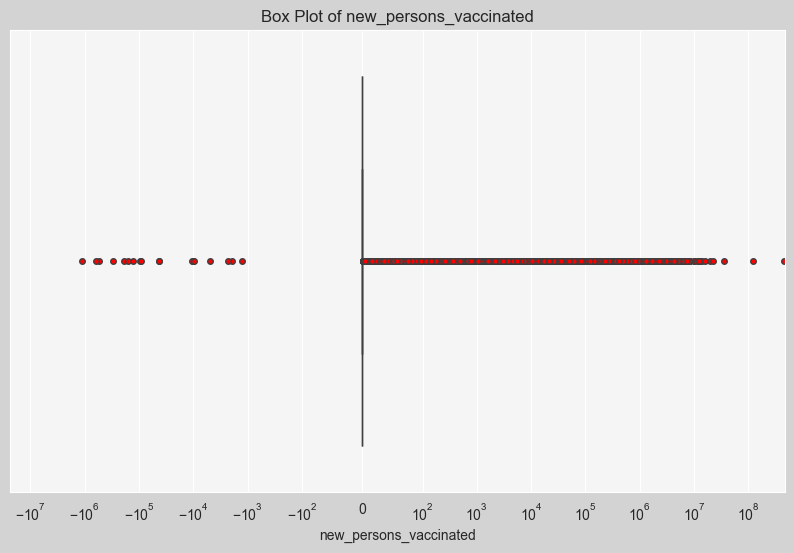

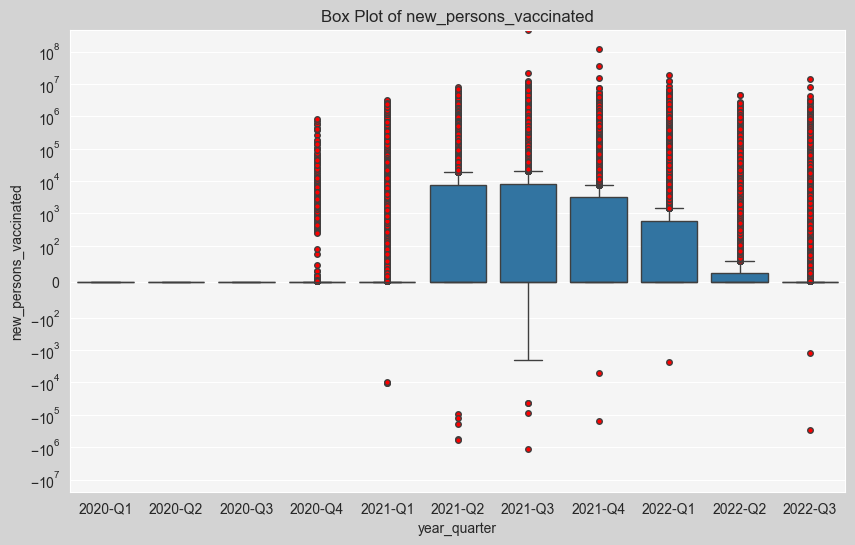

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')  # Background for the figure

ax.set_facecolor('whitesmoke')

sns.boxplot(x='new_persons_vaccinated' ,data=df, flierprops = flierprops)
ax.set_xscale('symlog',linthresh =100)
# ax.set_xscale('log')
plt.title('Box Plot of new_persons_vaccinated')
plt.xlabel('new_persons_vaccinated')
plt.show()



fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')  # Background for the figure

ax.set_facecolor('whitesmoke')

sns.boxplot(y='new_persons_vaccinated',x='year_quarter',data=df, flierprops = flierprops)
ax.set_yscale('symlog',linthresh =100)
# ax.set_xscale('log')
plt.title('Box Plot of new_persons_vaccinated')
plt.ylabel('new_persons_vaccinated')
plt.show()

### 1.4 Population

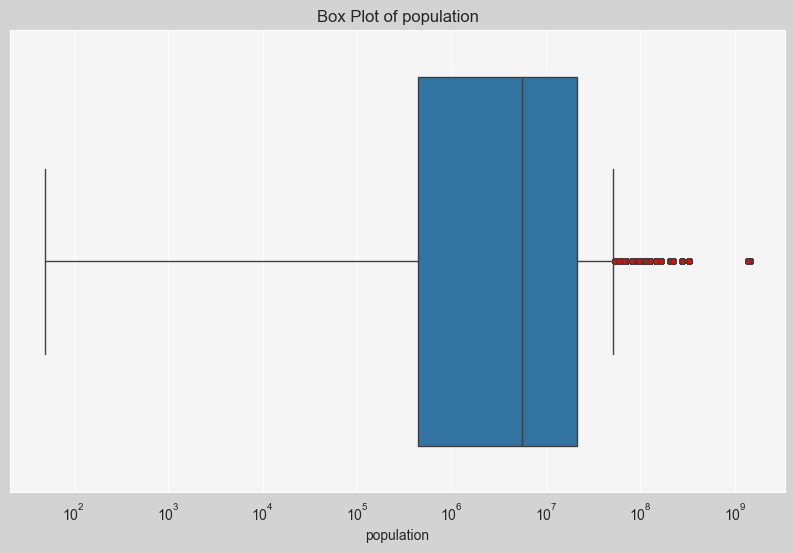

In [181]:
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='population' ,data=df, flierprops = flierprops)  # 2 × IQR zamiast 1.5
ax.set_xscale('log')

plt.title('Box Plot of population')
plt.xlabel('population')
plt.show()

### 1.6.1 Population density

<Figure size 1000x600 with 0 Axes>

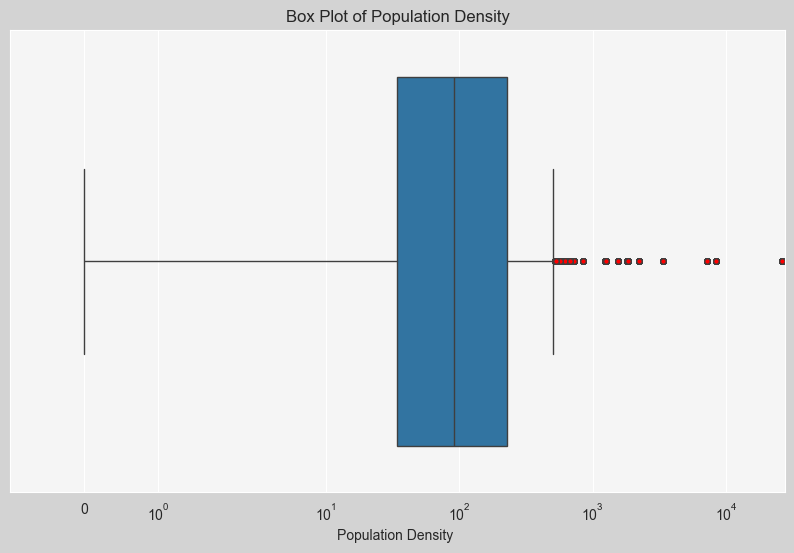

In [88]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='population_density' ,data=df, flierprops  = flierprops)

ax.set_xscale('symlog')
ax.set_xlim(left=-1)
plt.title('Box Plot of Population Density')
plt.xlabel('Population Density ')
plt.show()

### 1.5 Current GDP

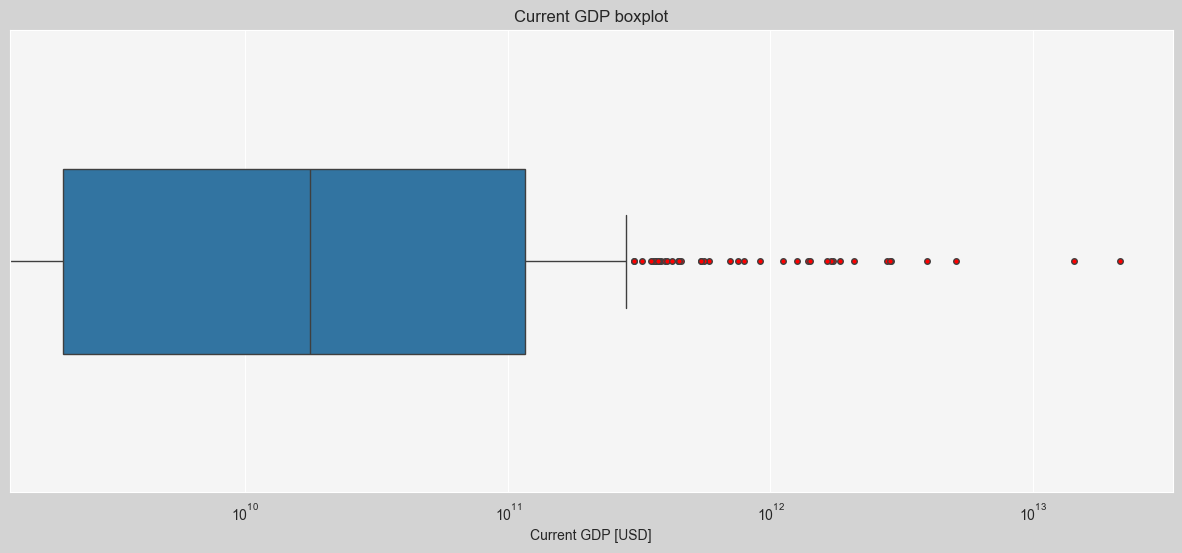

In [90]:
fig, ax = plt.subplots(figsize=(15, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='current_gdp_usd', data=df2, ax=ax, flierprops=flierprops, width=0.4)

ax.set_xscale('log')

plt.title('Current GDP boxplot')
plt.xlabel('Current GDP [USD]')
plt.show()

### 1.6.2 New persons fully vaccinated

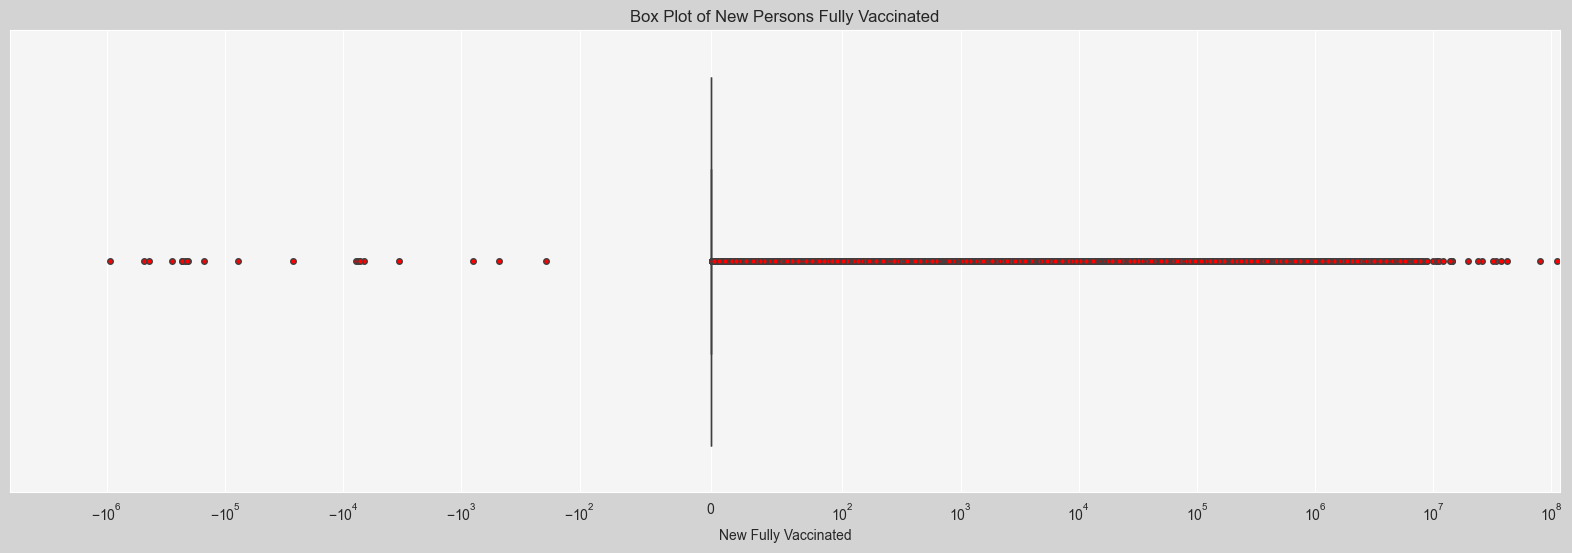

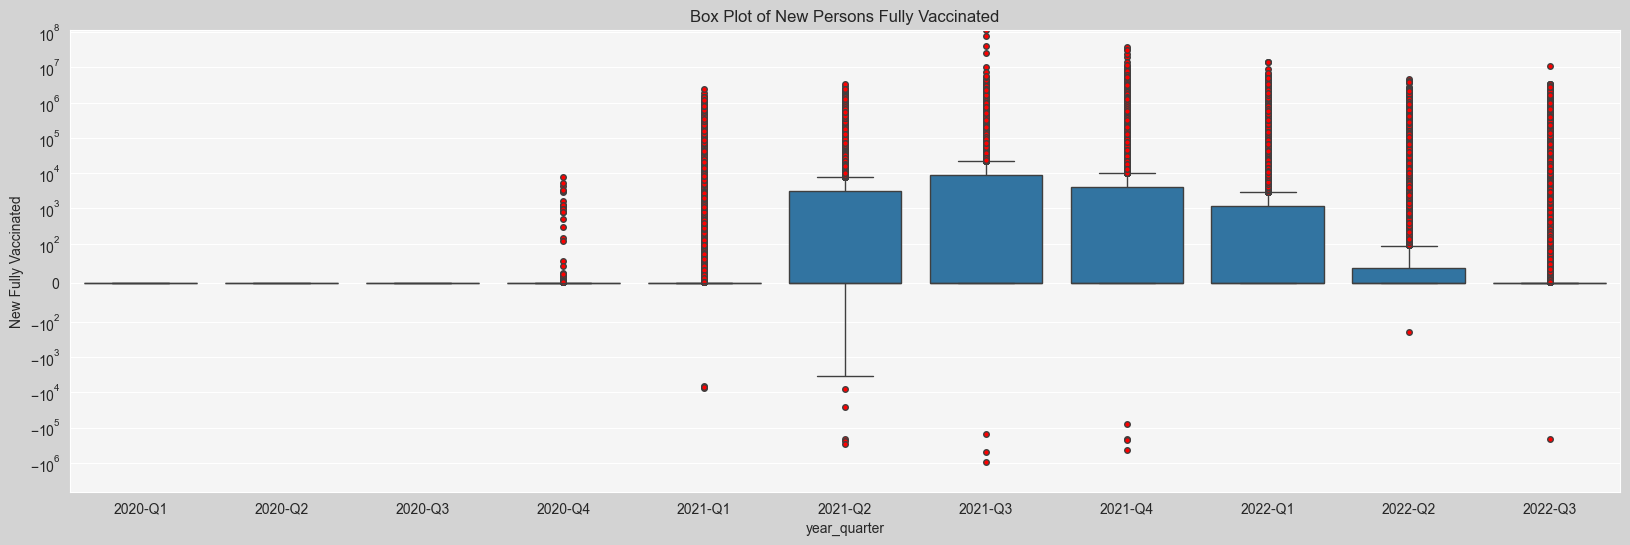

In [82]:
fig, ax = plt.subplots(figsize=(20, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='new_persons_fully_vaccinated' ,data=df, flierprops = flierprops)
ax.set_xscale('symlog', linthresh=100.0)

plt.title('Box Plot of New Persons Fully Vaccinated')
plt.xlabel('New Fully Vaccinated')
plt.show()

fig, ax = plt.subplots(figsize=(20, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(y='new_persons_fully_vaccinated',x='year_quarter' ,data=df, flierprops = flierprops)
ax.set_yscale('symlog', linthresh=100.0)

plt.title('Box Plot of New Persons Fully Vaccinated')
plt.ylabel('New Fully Vaccinated')
plt.show()


### 1.6.3 Cumulative confirmed

<Figure size 1000x600 with 0 Axes>

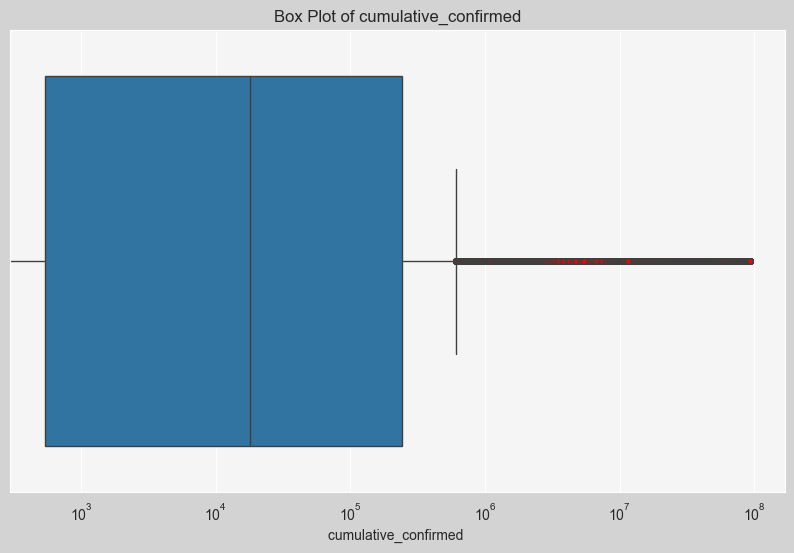

In [93]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='cumulative_confirmed' ,data=df, flierprops  = flierprops)

ax.set_xscale('log')

plt.title('Box Plot of cumulative_confirmed')
plt.xlabel('cumulative_confirmed ')
plt.show()

### 1.6.4 Cumulative deceased

<Figure size 1000x600 with 0 Axes>

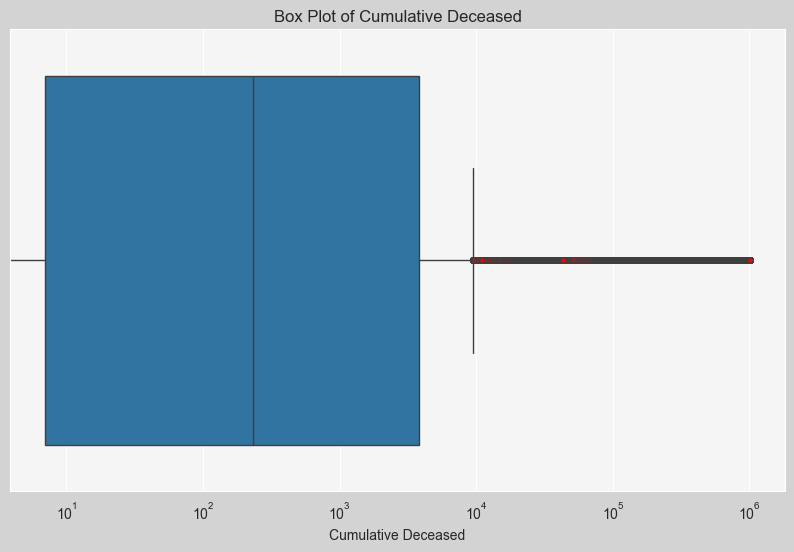

In [94]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('lightgray')
ax.set_facecolor('whitesmoke')

sns.boxplot(x='cumulative_deceased' ,data=df, flierprops  = flierprops)

ax.set_xscale('log')

plt.title('Box Plot of Cumulative Deceased')
plt.xlabel('Cumulative Deceased')
plt.show()

## Część druga.

In [26]:
# df3 = pd.read_csv("results/part5bigdata.csv")

df_zscore = df.copy()
df_iqr = df.copy()

In [27]:
df

,date,country_name,new_confirmed,cumulative_confirmed,new_deceased,cumulative_persons_vaccinated,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_persons_fully_vaccinated,vaccination_rate,population,population_density,fatality_rate,cumulative_deceased
0,2020-01-01,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
1,2020-01-02,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
2,2020-01-03,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
3,2020-01-04,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
4,2020-01-05,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228916,2022-09-13,Zimbabwe,0,256939,0,0,0,0,0,0.0,14862927,38.420,0.037651,5596
228917,2022-09-14,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0
228918,2022-09-15,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0
228919,2022-09-16,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0


In [21]:
df2

,country_code,country_name,population,population_density,area_sq_km,gdp_usd
0,ARE,United Arab Emirates,9890400,118.306,83600,421142267937
1,BIH,Bosnia and Herzegovina,3280815,64.330,51210,20047848434
2,BEN,Benin,12123198,107.513,114760,14390709094
3,COD,Democratic Republic of the Congo,89561404,39.506,2344860,47319624204
4,CRI,Costa Rica,5094114,99.767,51100,61773944173
...,...,...,...,...,...,...
226,VAT,Vatican City,809,1838.636,0,0
227,VCT,Saint Vincent and the Grenadines,110947,284.479,390,825385185
228,VEN,Venezuela,28435943,32.238,912050,0
229,VIR,United States Virgin Islands,104423,298.351,350,3855000000


### 2 - Z-SCORE - new_confirmed

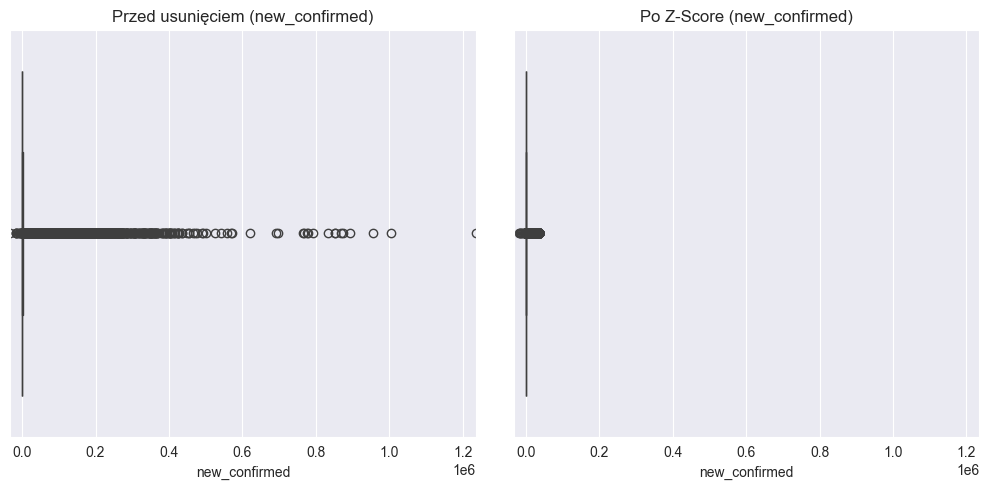

In [24]:
z_scores = zscore(df_zscore["new_confirmed"])
abs_z_scores = np.abs(z_scores)

threshold = 2
filtered_entries = abs_z_scores < threshold

xmin = df["new_confirmed"].min()
xmax = df["new_confirmed"].max()

# Usuwamy outliery
df_zscore = df_zscore[filtered_entries]

# Wykres przed i po
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["new_confirmed"])
plt.title("Przed usunięciem (new_confirmed)")
plt.xlim(xmin, xmax)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore["new_confirmed"])
plt.title("Po Z-Score (new_confirmed)")
plt.tight_layout()
plt.xlim(xmin, xmax)
plt.show()

### 2 - IQR - new_deceased

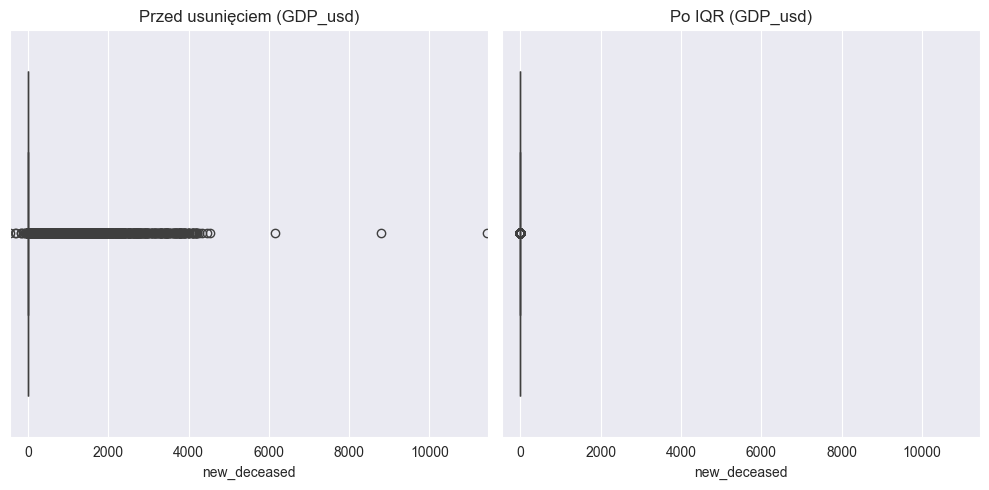

In [29]:
# IQR dla 'gdp_usd'
Q1 = df_iqr["new_deceased"].quantile(0.25)
Q3 = df_iqr["new_deceased"].quantile(0.75)
IQR = Q3 - Q1

# Granice
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtracja
df_iqr = df_iqr[(df_iqr["new_deceased"] >= lower_bound) & (df_iqr["new_deceased"] <= upper_bound)]

# Zakresy osi x na podstawie oryginalnych danych
xmin = df["new_deceased"].min()
xmax = df["new_deceased"].max()

# Wykres przed i po
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["new_deceased"])
plt.title("Przed usunięciem (GDP_usd)")
plt.xlim(xmin, xmax)  # ustalenie zakresu osi x

plt.subplot(1, 2, 2)
sns.boxplot(x=df_iqr["new_deceased"])
plt.title("Po IQR (GDP_usd)")
plt.xlim(xmin, xmax)  # ten sam zakres osi x dla porównania

plt.tight_layout()
plt.show()

### 2 - Z-SCORE - new_deceased

In [ ]:
df_zscore_deceased = df.copy()

z_scores_deceased = zscore(df_zscore_deceased["new_deceased"])
abs_z_scores_deceased = np.abs(z_scores_deceased)

threshold = 2
filtered_entries_deceased = abs_z_scores_deceased < threshold

# Zakresy osi x przed filtrowaniem
xmin = df["new_deceased"].min()
xmax = df["new_deceased"].max()

df_zscore_deceased = df_zscore_deceased[filtered_entries_deceased]

# Wykresy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["new_deceased"])
plt.title("new_deceased - przed (Z-Score)")
plt.xlim(xmin, xmax)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_zscore_deceased["new_deceased"])
plt.title("new_deceased - po (Z-Score)")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()


### 2 - IQR - new_confirmed

In [ ]:
df_iqr_cases = df.copy()

Q1 = df_iqr_cases["new_confirmed"].quantile(0.25)
Q3 = df_iqr_cases["new_confirmed"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_iqr_cases = df_iqr_cases[
    (df_iqr_cases["new_confirmed"] >= lower_bound) &
    (df_iqr_cases["new_confirmed"] <= upper_bound)
]

# Zakresy osi x na podstawie oryginalnych danych
xmin = df["new_confirmed"].min()
xmax = df["new_confirmed"].max()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["new_confirmed"])
plt.title("new_confirmed - przed IQR")
plt.xlim(xmin, xmax)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_iqr_cases["new_confirmed"])
plt.title("new_confirmed - po IQR")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

### 2 - LOF - new_deceased

E:\BigData\.venv\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


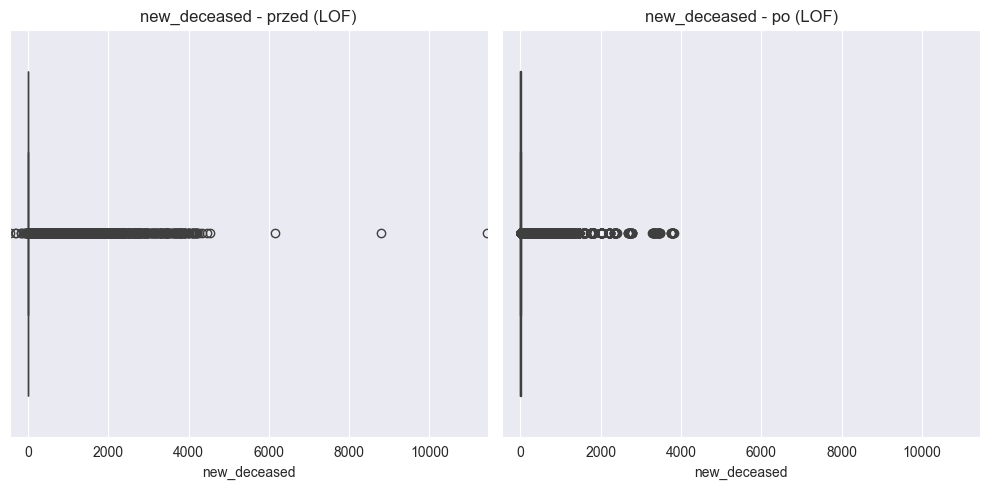

In [30]:
from sklearn.neighbors import LocalOutlierFactor

df_lof_deceased = df.copy()

# Przygotowanie danych
X = df_lof_deceased["new_deceased"].values.reshape(-1, 1)

# Inicjalizacja modelu LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Możesz dostosować
y_pred = lof.fit_predict(X)

# Filtrowanie danych (-1 = outlier, 1 = normalny punkt)
df_lof_deceased["outlier"] = y_pred
df_lof_deceased = df_lof_deceased[df_lof_deceased["outlier"] == 1]  # zostawiamy tylko normalne punkty

# Zakresy osi x przed filtrowaniem
xmin = df["new_deceased"].min()
xmax = df["new_deceased"].max()

# Wykresy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["new_deceased"])
plt.title("new_deceased - przed (LOF)")
plt.xlim(xmin, xmax)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_lof_deceased["new_deceased"])
plt.title("new_deceased - po (LOF)")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

### 2 - LOF - new_confirmed

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

df_lof_confirmed = df.copy()

# Przygotowanie danych
X = df_lof_confirmed["new_confirmed"].values.reshape(-1, 1)

# Inicjalizacja modelu LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Możesz dostosować
y_pred = lof.fit_predict(X)

# Filtrowanie danych (-1 = outlier, 1 = normalny punkt)
df_lof_confirmed["outlier"] = y_pred
df_lof_confirmed = df_lof_confirmed[df_lof_confirmed["outlier"] == 1]  # zostawiamy tylko normalne punkty

# Zakresy osi x przed filtrowaniem
xmin = df["new_confirmed"].min()
xmax = df["new_confirmed"].max()

# Wykresy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["new_confirmed"])
plt.title("new_confirmed - przed (LOF)")
plt.xlim(xmin, xmax)

plt.subplot(1, 2, 2)
sns.boxplot(x=df_lof_confirmed["new_confirmed"])
plt.title("new_confirmed - po (LOF)")
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

## Część trzecia.

In [34]:
countries = ['Poland', 'Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Netherlands', 'Belgium', 'Japan', 'Austria']
selected_month = '2021-04'
df['date'] = pd.to_datetime(df['date'])
df_miesiac = df[(df['country_name'].isin(countries)) & (df['date'].dt.to_period('M') == selected_month)]
df_miesiac = df_miesiac.sort_values(['country_name', 'date'])

In [32]:
df_miesiac

,date,country_name,new_confirmed,cumulative_confirmed,new_deceased,cumulative_persons_vaccinated,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_persons_fully_vaccinated,vaccination_rate,population,population_density,fatality_rate,cumulative_deceased
12348,2021-04-01,Austria,3076,545748,36,1282876,23154,488370,19431,5.512839,8858775,107.1,0.129679,11488
12349,2021-04-02,Austria,3294,549042,42,1307892,25016,507970,19600,5.734089,8858775,107.1,0.130153,11530
12350,2021-04-03,Austria,2813,551855,38,1320786,12894,517133,9163,5.837523,8858775,107.1,0.130582,11568
12351,2021-04-04,Austria,2327,554182,47,1329175,8389,518940,1807,5.857921,8858775,107.1,0.131113,11615
12352,2021-04-05,Austria,2006,556188,32,1337088,7913,523784,4844,5.912601,8858775,107.1,0.131474,11647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216519,2021-04-26,United Kingdom,2627,4493043,14,33843580,90695,13201811,304688,19.808527,66647112,273.8,0.192391,128223
216520,2021-04-27,United Kingdom,2177,4495220,16,33959908,116328,13581076,379265,20.377591,66647112,273.8,0.192415,128239
216521,2021-04-28,United Kingdom,2499,4497719,16,34094048,134140,14043961,462885,21.072122,66647112,273.8,0.192439,128255
216522,2021-04-29,United Kingdom,2230,4499949,16,34216616,122568,14535528,491567,21.809689,66647112,273.8,0.192463,128271


### 3.1 Zachorowania, śmierci i szczepienia

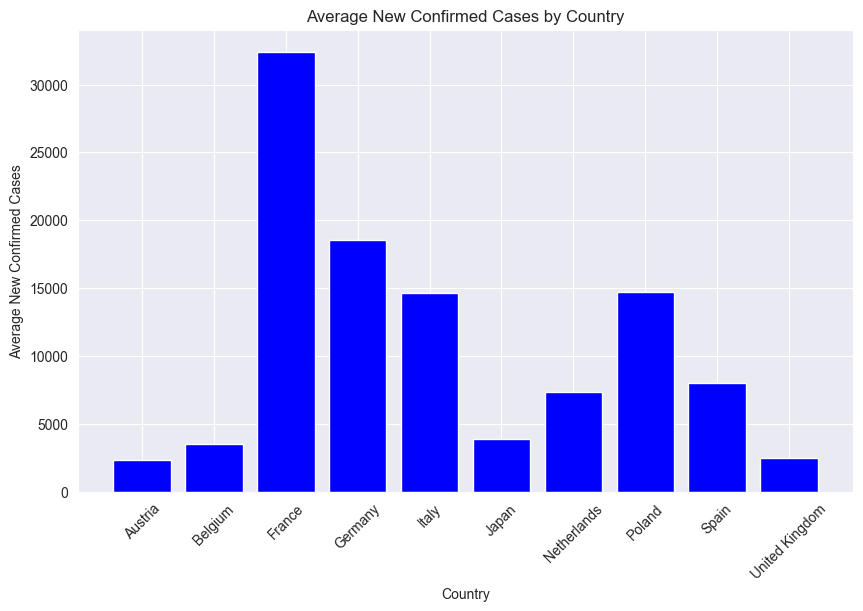

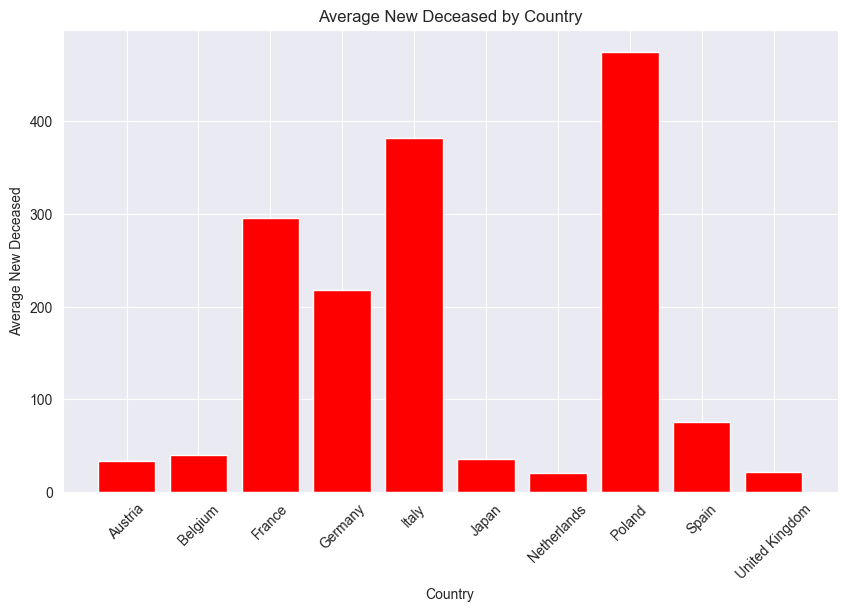

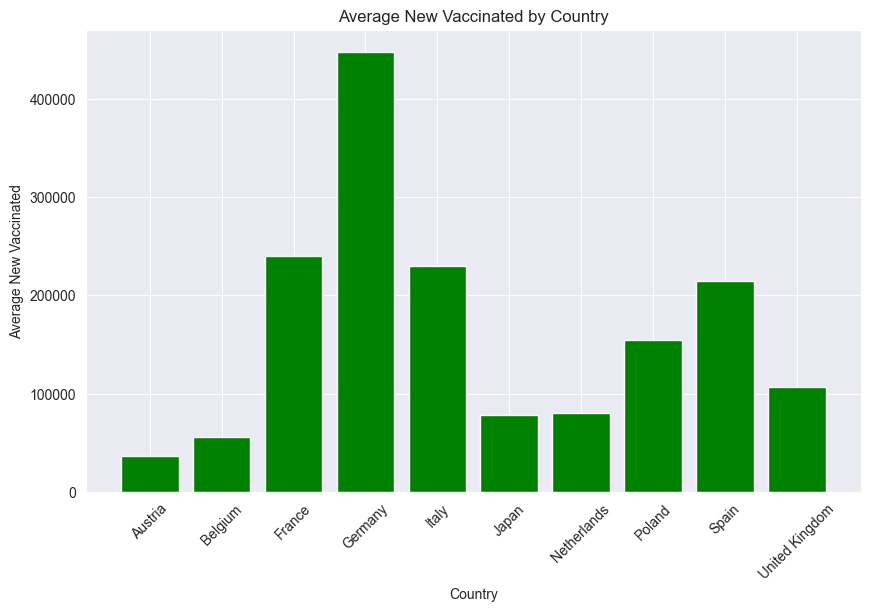

In [35]:
countries = df_miesiac['country_name'].unique()
average_new_confirmed_by_country = df_miesiac.groupby('country_name')['new_confirmed'].mean()
average_new_deceased_by_country = df_miesiac.groupby('country_name')['new_deceased'].mean()
average_new_vaccinated_by_country = df_miesiac.groupby('country_name')['new_persons_vaccinated'].mean()


plt.figure(figsize=(10, 6))
plt.bar(countries, average_new_confirmed_by_country, color='blue')
plt.title('Average New Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Average New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Plot average new deceased by country
plt.figure(figsize=(10, 6))
plt.bar(countries, average_new_deceased_by_country, color='red')
plt.title('Average New Deceased by Country')
plt.xlabel('Country')
plt.ylabel('Average New Deceased')
plt.xticks(rotation=45)
plt.show()

# Plot average new vaccinated by country
plt.figure(figsize=(10, 6))
plt.bar(countries, average_new_vaccinated_by_country, color='green')
plt.title('Average New Vaccinated by Country')
plt.xlabel('Country')
plt.ylabel('Average New Vaccinated')
plt.xticks(rotation=45)
plt.show()

### 3.2 Średnia zmiana liczby zachorowań, śmierci i szczepień

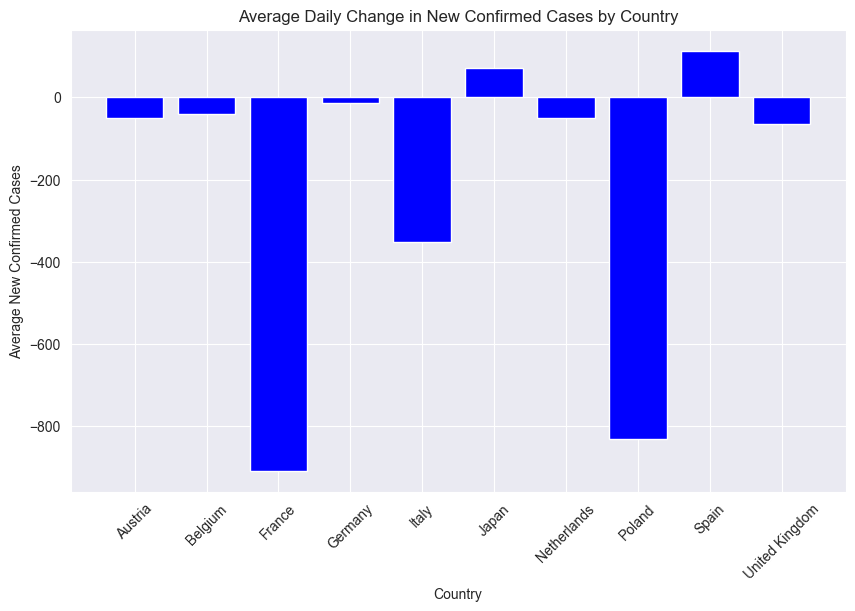

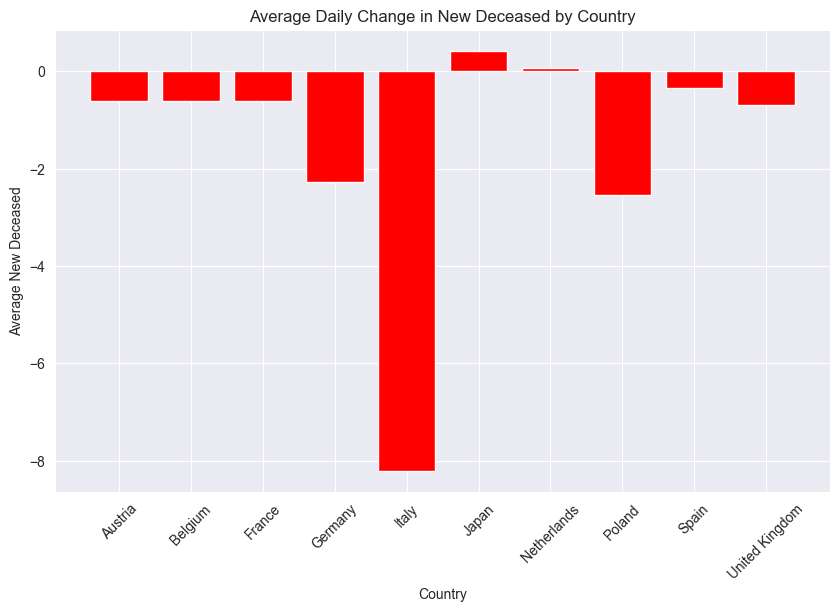

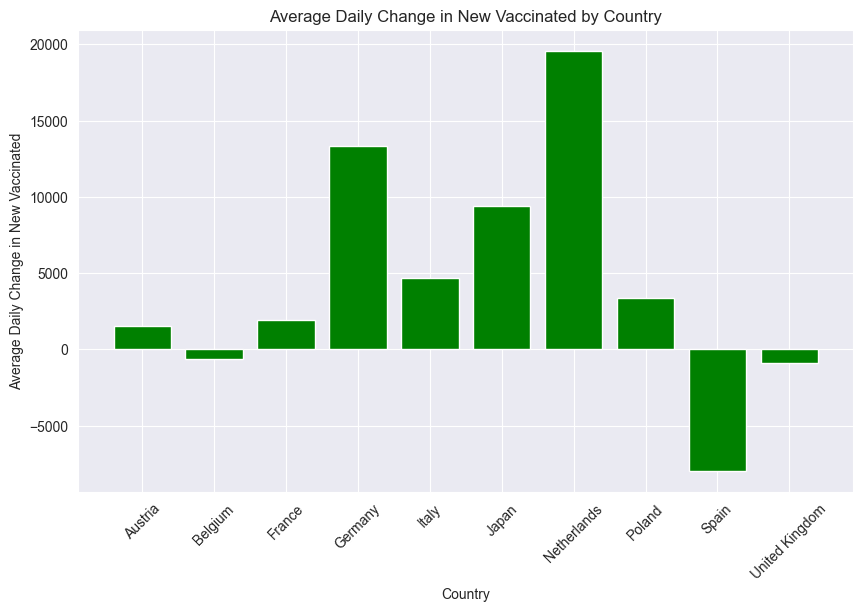

In [38]:
countries = df_miesiac['country_name'].unique()
df_miesiac['delta_confirmed'] = df_miesiac.groupby('country_name')['new_confirmed'].diff()
df_miesiac['delta_deceased'] = df_miesiac.groupby('country_name')['new_deceased'].diff()
df_miesiac['delta_vaccinated'] = df_miesiac.groupby('country_name')['new_persons_vaccinated'].diff()

df_miesiac_clean = df_miesiac.dropna(subset=['delta_confirmed', 'delta_deceased', 'delta_vaccinated'])

# Liczymy średnie zmiany dzienne
avg_delta_confirmed = df_miesiac_clean.groupby('country_name')['delta_confirmed'].mean()
avg_delta_deceased = df_miesiac_clean.groupby('country_name')['delta_deceased'].mean()
avg_delta_vaccinated = df_miesiac_clean.groupby('country_name')['delta_vaccinated'].mean()


plt.figure(figsize=(10, 6))
plt.bar(countries, avg_delta_confirmed, color='blue')
plt.title('Average Daily Change in New Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Average New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(countries, avg_delta_deceased, color='red')
plt.title('Average Daily Change in New Deceased by Country')
plt.xlabel('Country')
plt.ylabel('Average New Deceased')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(countries, avg_delta_vaccinated, color='green')
plt.title('Average Daily Change in New Vaccinated by Country')
plt.xlabel('Country')
plt.ylabel('Average Daily Change in New Vaccinated')
plt.xticks(rotation=45)
plt.show()

### 3.3 Mediana zachorowań, śmierci i szczepień

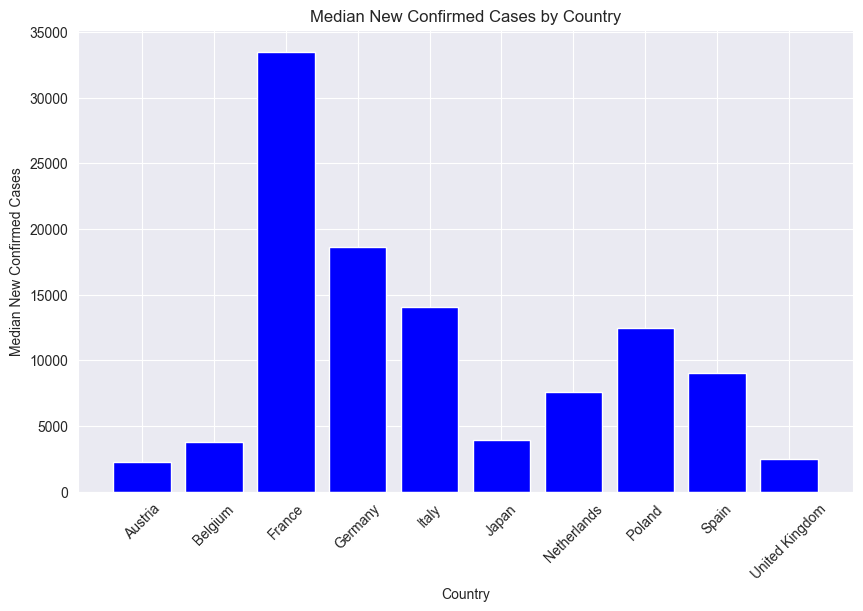

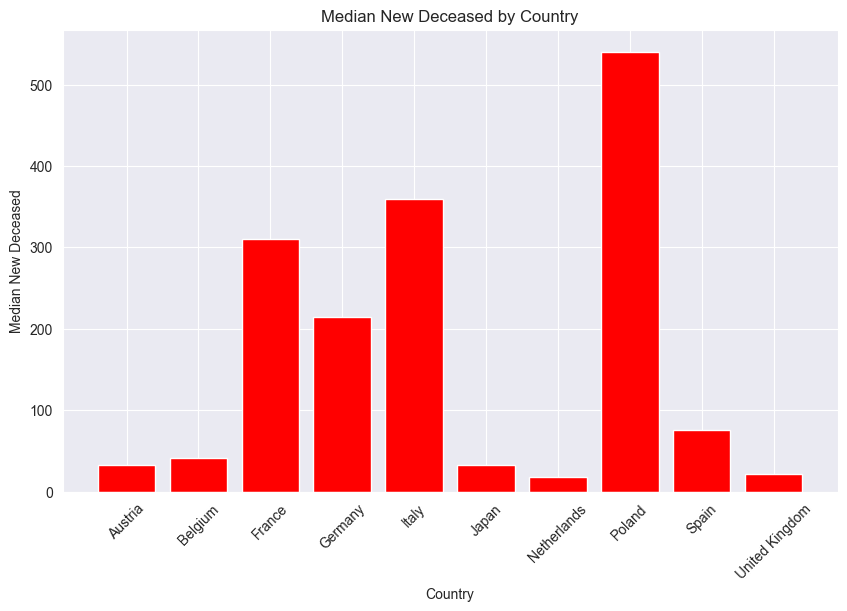

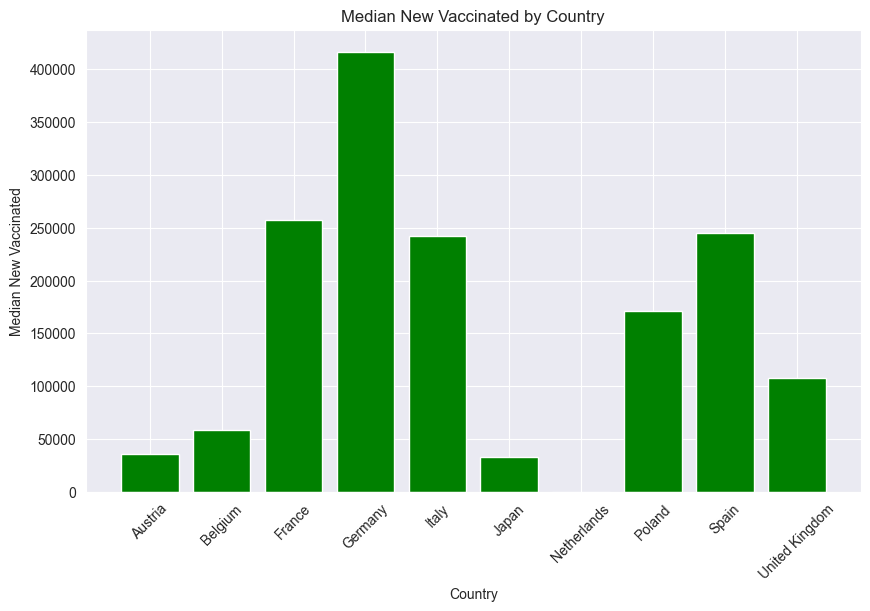

In [190]:
median_new_confirmed_by_country = df_miesiac.groupby('country_name')['new_confirmed'].median()
median_new_deceased_by_country = df_miesiac.groupby('country_name')['new_deceased'].median()
median_new_vaccinated_by_country = df_miesiac.groupby('country_name')['new_persons_vaccinated'].median()

plt.figure(figsize=(10, 6))
plt.bar(countries, median_new_confirmed_by_country, color='blue')
plt.title('Median New Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Median New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Plot average new deceased by country
plt.figure(figsize=(10, 6))
plt.bar(countries, median_new_deceased_by_country, color='red')
plt.title('Median New Deceased by Country')
plt.xlabel('Country')
plt.ylabel('Median New Deceased')
plt.xticks(rotation=45)
plt.show()

# Plot average new vaccinated by country
plt.figure(figsize=(10, 6))
plt.bar(countries, median_new_vaccinated_by_country, color='green')
plt.title('Median New Vaccinated by Country')
plt.xlabel('Country')
plt.ylabel('Median New Vaccinated')
plt.xticks(rotation=45)
plt.show()

### 3.4 Odchylenie standardowe dla zachorowań, śmierci i szczepień

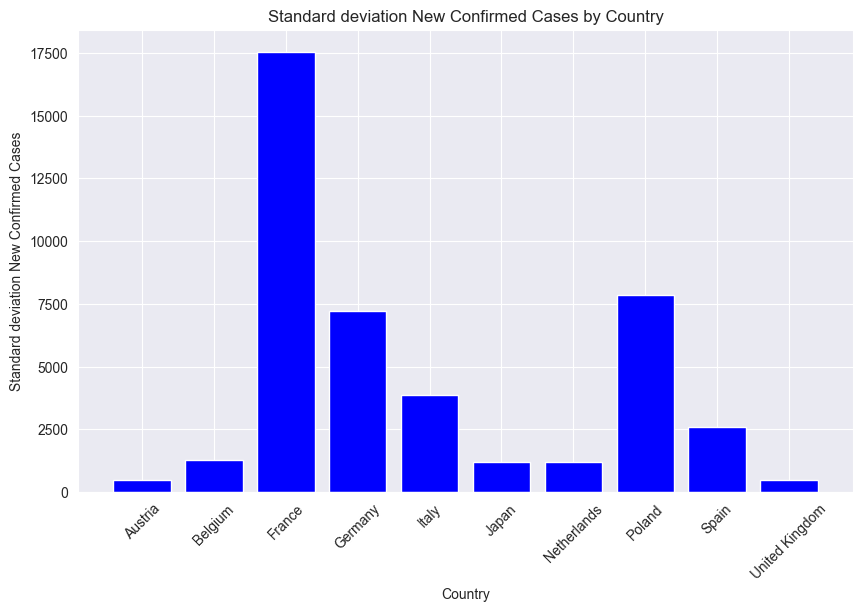

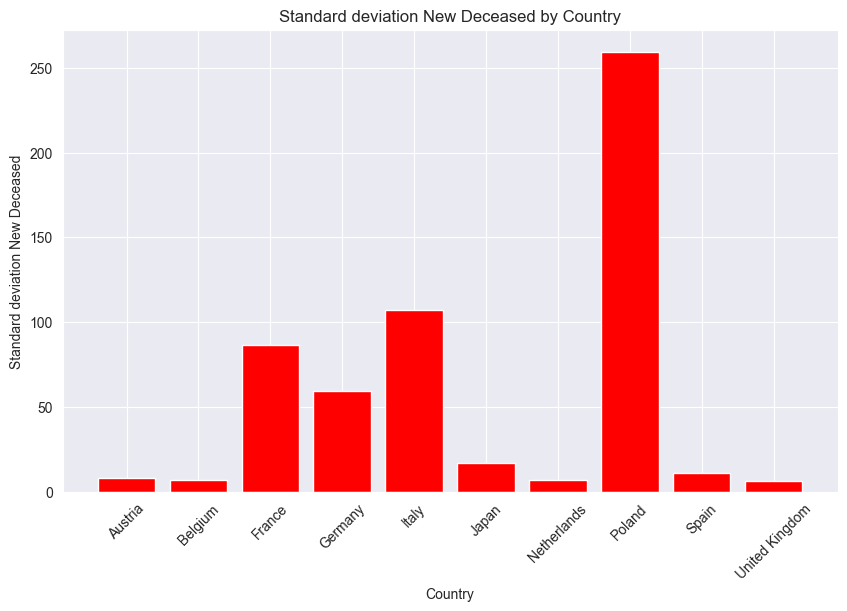

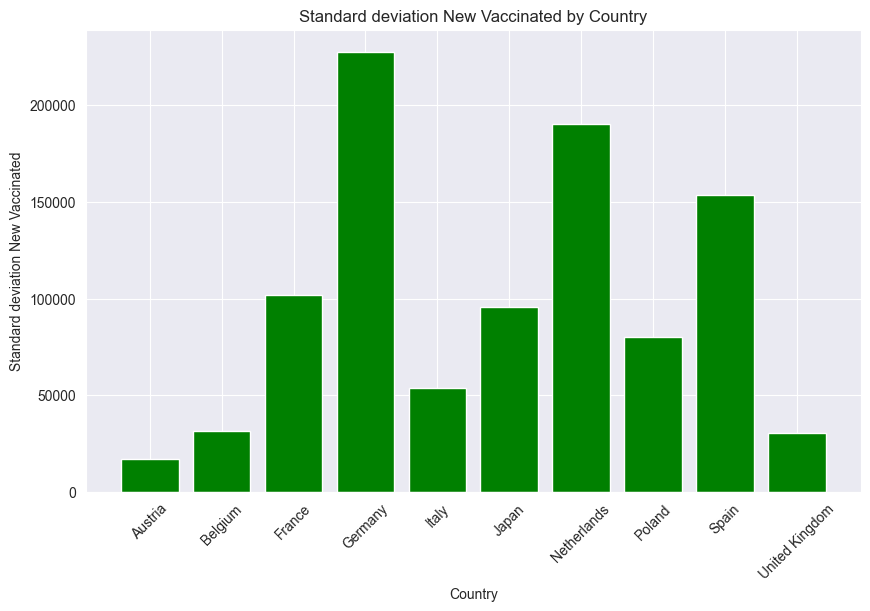

In [191]:
std_new_confirmed_by_country = df_miesiac.groupby('country_name')['new_confirmed'].std()
std_new_deceased_by_country = df_miesiac.groupby('country_name')['new_deceased'].std()
std_new_vaccinated_by_country = df_miesiac.groupby('country_name')['new_persons_vaccinated'].std()

plt.figure(figsize=(10, 6))
plt.bar(countries, std_new_confirmed_by_country, color='blue')
plt.title('Standard deviation New Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Standard deviation New Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Plot average new deceased by country
plt.figure(figsize=(10, 6))
plt.bar(countries, std_new_deceased_by_country, color='red')
plt.title('Standard deviation New Deceased by Country')
plt.xlabel('Country')
plt.ylabel('Standard deviation New Deceased')
plt.xticks(rotation=45)
plt.show()

# Plot average new vaccinated by country
plt.figure(figsize=(10, 6))
plt.bar(countries, std_new_vaccinated_by_country, color='green')
plt.title('Standard deviation New Vaccinated by Country')
plt.xlabel('Country')
plt.ylabel('Standard deviation New Vaccinated')
plt.xticks(rotation=45)
plt.show()

### 3.5 Minimalna, średnia i maksymalna zachorowań, śmierci i szczepień a PKB

In [48]:
df_miesiac = df_miesiac.merge(df2[['country_name', 'current_gdp_usd']], left_on='country_name', right_on='country_name')


In [193]:
df_miesiac

,date,country_name,new_confirmed,cumulative_confirmed,new_deceased,cumulative_persons_vaccinated,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_persons_fully_vaccinated,vaccination_rate,population,population_density,fatality_rate,cumulative_deceased,current_gdp_usd
0,2021-04-01,Austria,3076,545748,36,1282876,23154,488370,19431,5.512839,8858775,107.1,0.129679,11488,455140042000
1,2021-04-02,Austria,3294,549042,42,1307892,25016,507970,19600,5.734089,8858775,107.1,0.130153,11530,455140042000
2,2021-04-03,Austria,2813,551855,38,1320786,12894,517133,9163,5.837523,8858775,107.1,0.130582,11568,455140042000
3,2021-04-04,Austria,2327,554182,47,1329175,8389,518940,1807,5.857921,8858775,107.1,0.131113,11615,455140042000
4,2021-04-05,Austria,2006,556188,32,1337088,7913,523784,4844,5.912601,8858775,107.1,0.131474,11647,455140042000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021-04-26,United Kingdom,2627,4493043,14,33843580,90695,13201811,304688,19.808527,66647112,273.8,0.192391,128223,2860009176200
296,2021-04-27,United Kingdom,2177,4495220,16,33959908,116328,13581076,379265,20.377591,66647112,273.8,0.192415,128239,2860009176200
297,2021-04-28,United Kingdom,2499,4497719,16,34094048,134140,14043961,462885,21.072122,66647112,273.8,0.192439,128255,2860009176200
298,2021-04-29,United Kingdom,2230,4499949,16,34216616,122568,14535528,491567,21.809689,66647112,273.8,0.192463,128271,2860009176200


C:\Users\user\AppData\Local\Temp\ipykernel_5712\2039870763.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_new_confirmed_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].min() / x['current_gdp_usd'].mean()))
C:\Users\user\AppData\Local\Temp\ipykernel_5712\2039870763.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_new_vaccinated_by_c

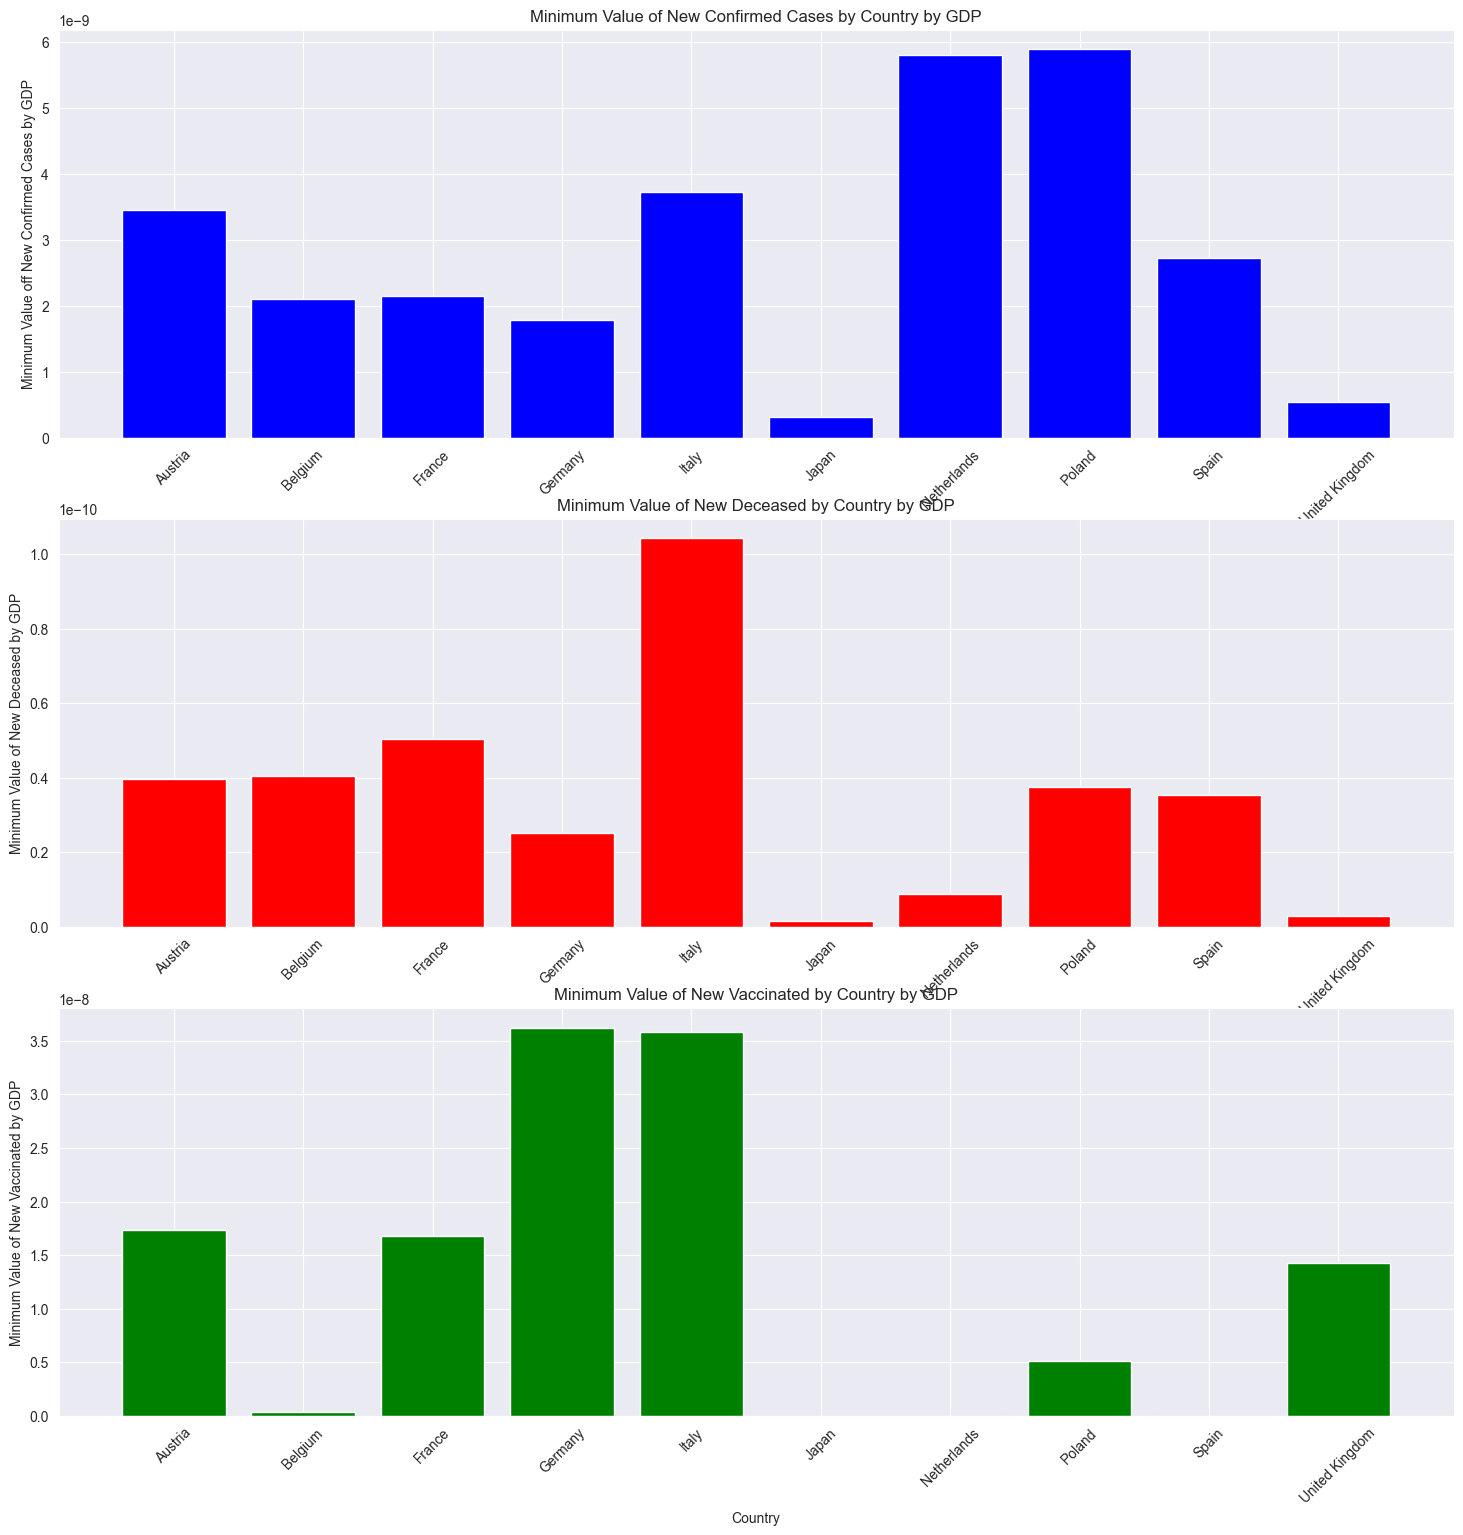

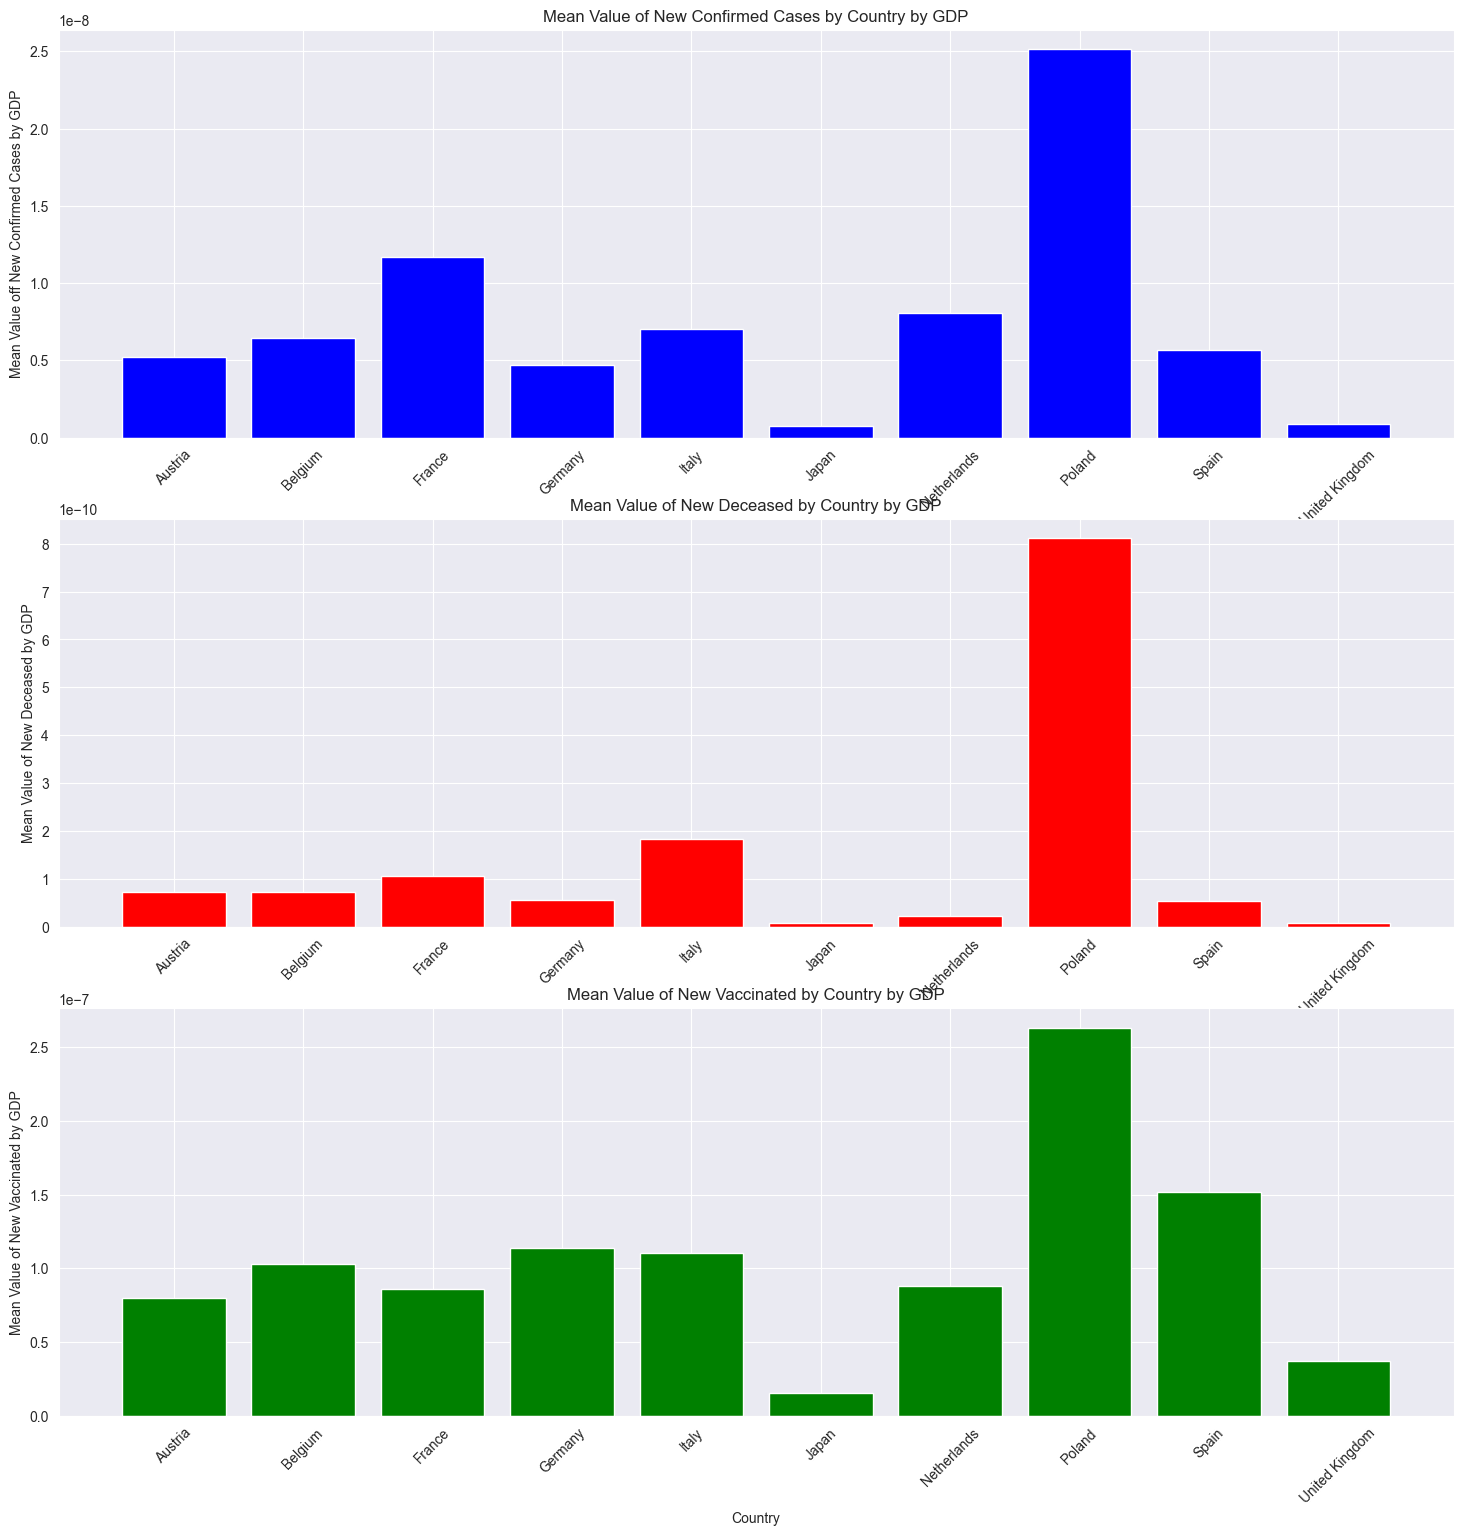

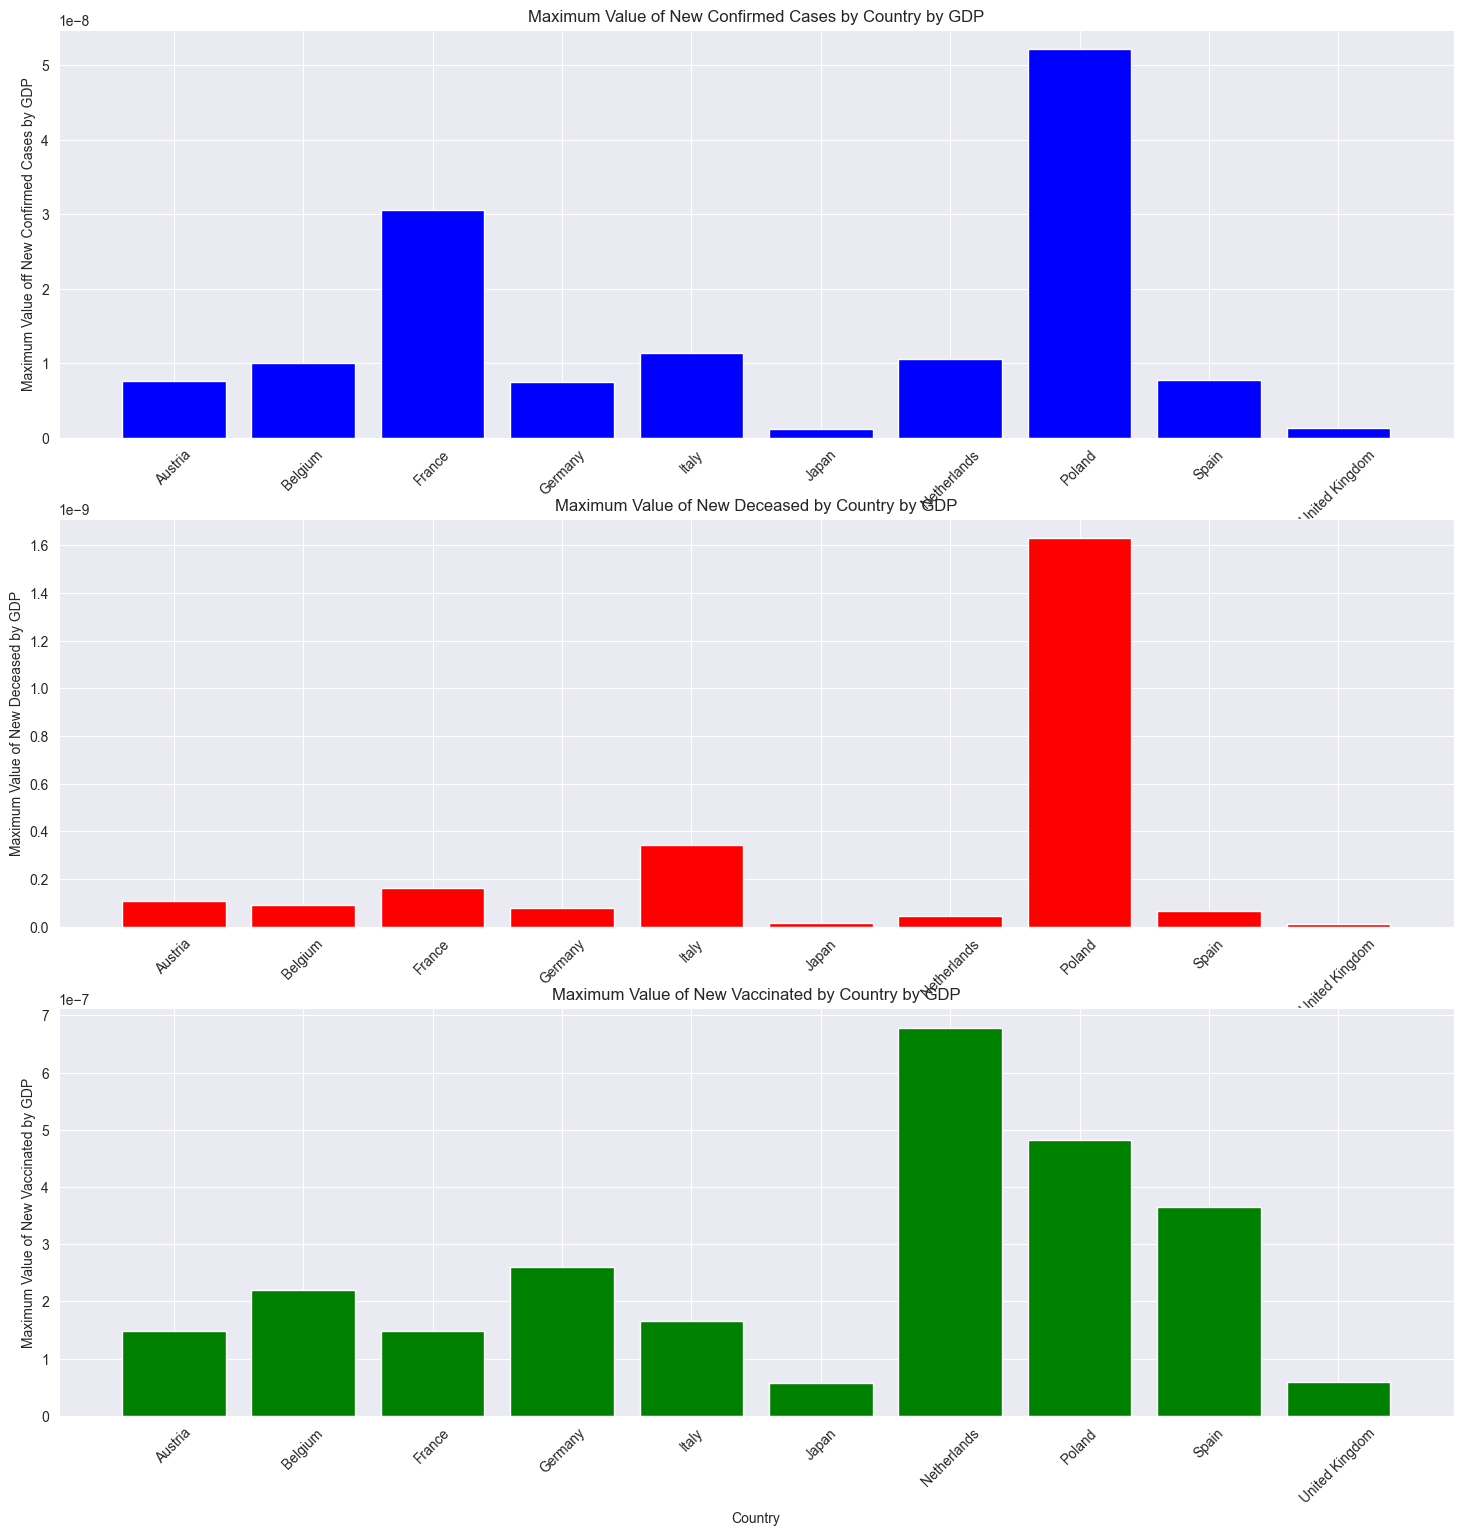

In [194]:
min_new_confirmed_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].min() / x['current_gdp_usd'].mean()))
min_new_vaccinated_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_persons_vaccinated'].min() / x['current_gdp_usd'].mean()))
min_new_deceased_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_deceased'].min() / x['current_gdp_usd'].mean()))


avg_new_confirmed_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].mean() / x['current_gdp_usd'].mean()))
avg_new_vaccinated_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_persons_vaccinated'].mean() / x['current_gdp_usd'].mean()))
avg_new_deceased_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_deceased'].mean() / x['current_gdp_usd'].mean()))


max_new_confirmed_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].max() / x['current_gdp_usd'].mean()))
max_new_deceased_by_country_by_gdp = df_miesiac.groupby('country_name',group_keys=False ).apply(lambda x: (x['new_deceased'].max() / x['current_gdp_usd'].mean()))
max_new_vaccinated_by_country_by_gdp = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_persons_vaccinated'].max() / x['current_gdp_usd'].mean()))

plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
plt.bar(countries, min_new_confirmed_by_country_by_gdp, color='blue')
plt.title('Minimum Value of New Confirmed Cases by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Minimum Value off New Confirmed Cases by GDP')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.bar(countries, min_new_deceased_by_country_by_gdp, color='red')
plt.title('Minimum Value of New Deceased by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Minimum Value of New Deceased by GDP')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.bar(countries, min_new_vaccinated_by_country_by_gdp, color='green')
plt.title('Minimum Value of New Vaccinated by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Minimum Value of New Vaccinated by GDP')
plt.xticks(rotation=45)

plt.show()


plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
plt.bar(countries, avg_new_confirmed_by_country_by_gdp, color='blue')
plt.title('Mean Value of New Confirmed Cases by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Mean Value off New Confirmed Cases by GDP')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.bar(countries, avg_new_deceased_by_country_by_gdp, color='red')
plt.title('Mean Value of New Deceased by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Mean Value of New Deceased by GDP')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.bar(countries, avg_new_vaccinated_by_country_by_gdp, color='green')
plt.title('Mean Value of New Vaccinated by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Mean Value of New Vaccinated by GDP')
plt.xticks(rotation=45)

plt.show()


plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
plt.bar(countries, max_new_confirmed_by_country_by_gdp, color='blue')
plt.title('Maximum Value of New Confirmed Cases by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Maximum Value off New Confirmed Cases by GDP')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.bar(countries, max_new_deceased_by_country_by_gdp, color='red')
plt.title('Maximum Value of New Deceased by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Maximum Value of New Deceased by GDP')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.bar(countries, max_new_vaccinated_by_country_by_gdp, color='green')
plt.title('Maximum Value of New Vaccinated by Country by GDP')
plt.xlabel('Country')
plt.ylabel('Maximum Value of New Vaccinated by GDP')
plt.xticks(rotation=45)

plt.show()




### 3.6 Minimalna, średnia i maksymalna zachorowań, śmierci i szczepień a populacja

C:\Users\user\AppData\Local\Temp\ipykernel_5712\2567455680.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_new_confirmed_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].min() / x['population'].mean()))
C:\Users\user\AppData\Local\Temp\ipykernel_5712\2567455680.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_new_vaccinated_by_countr

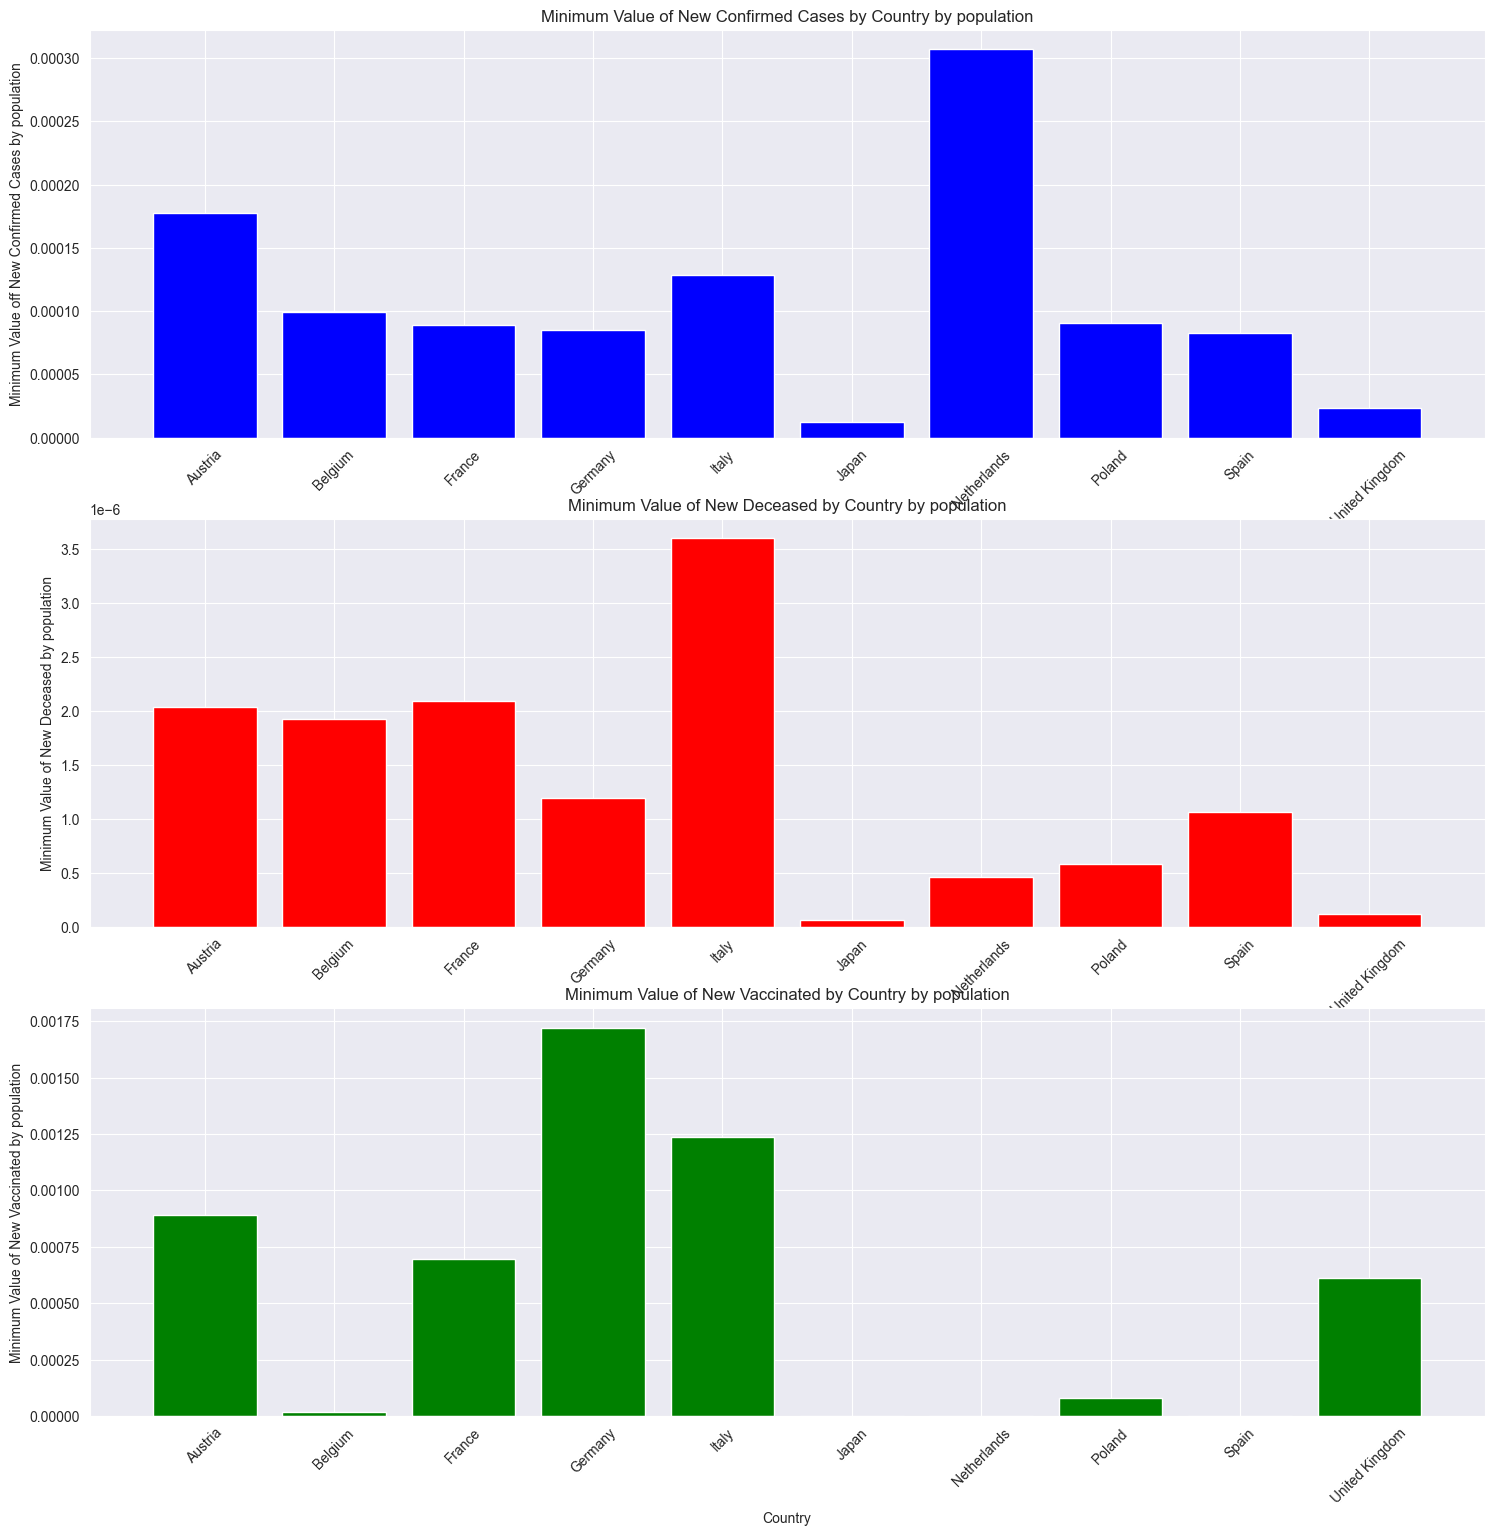

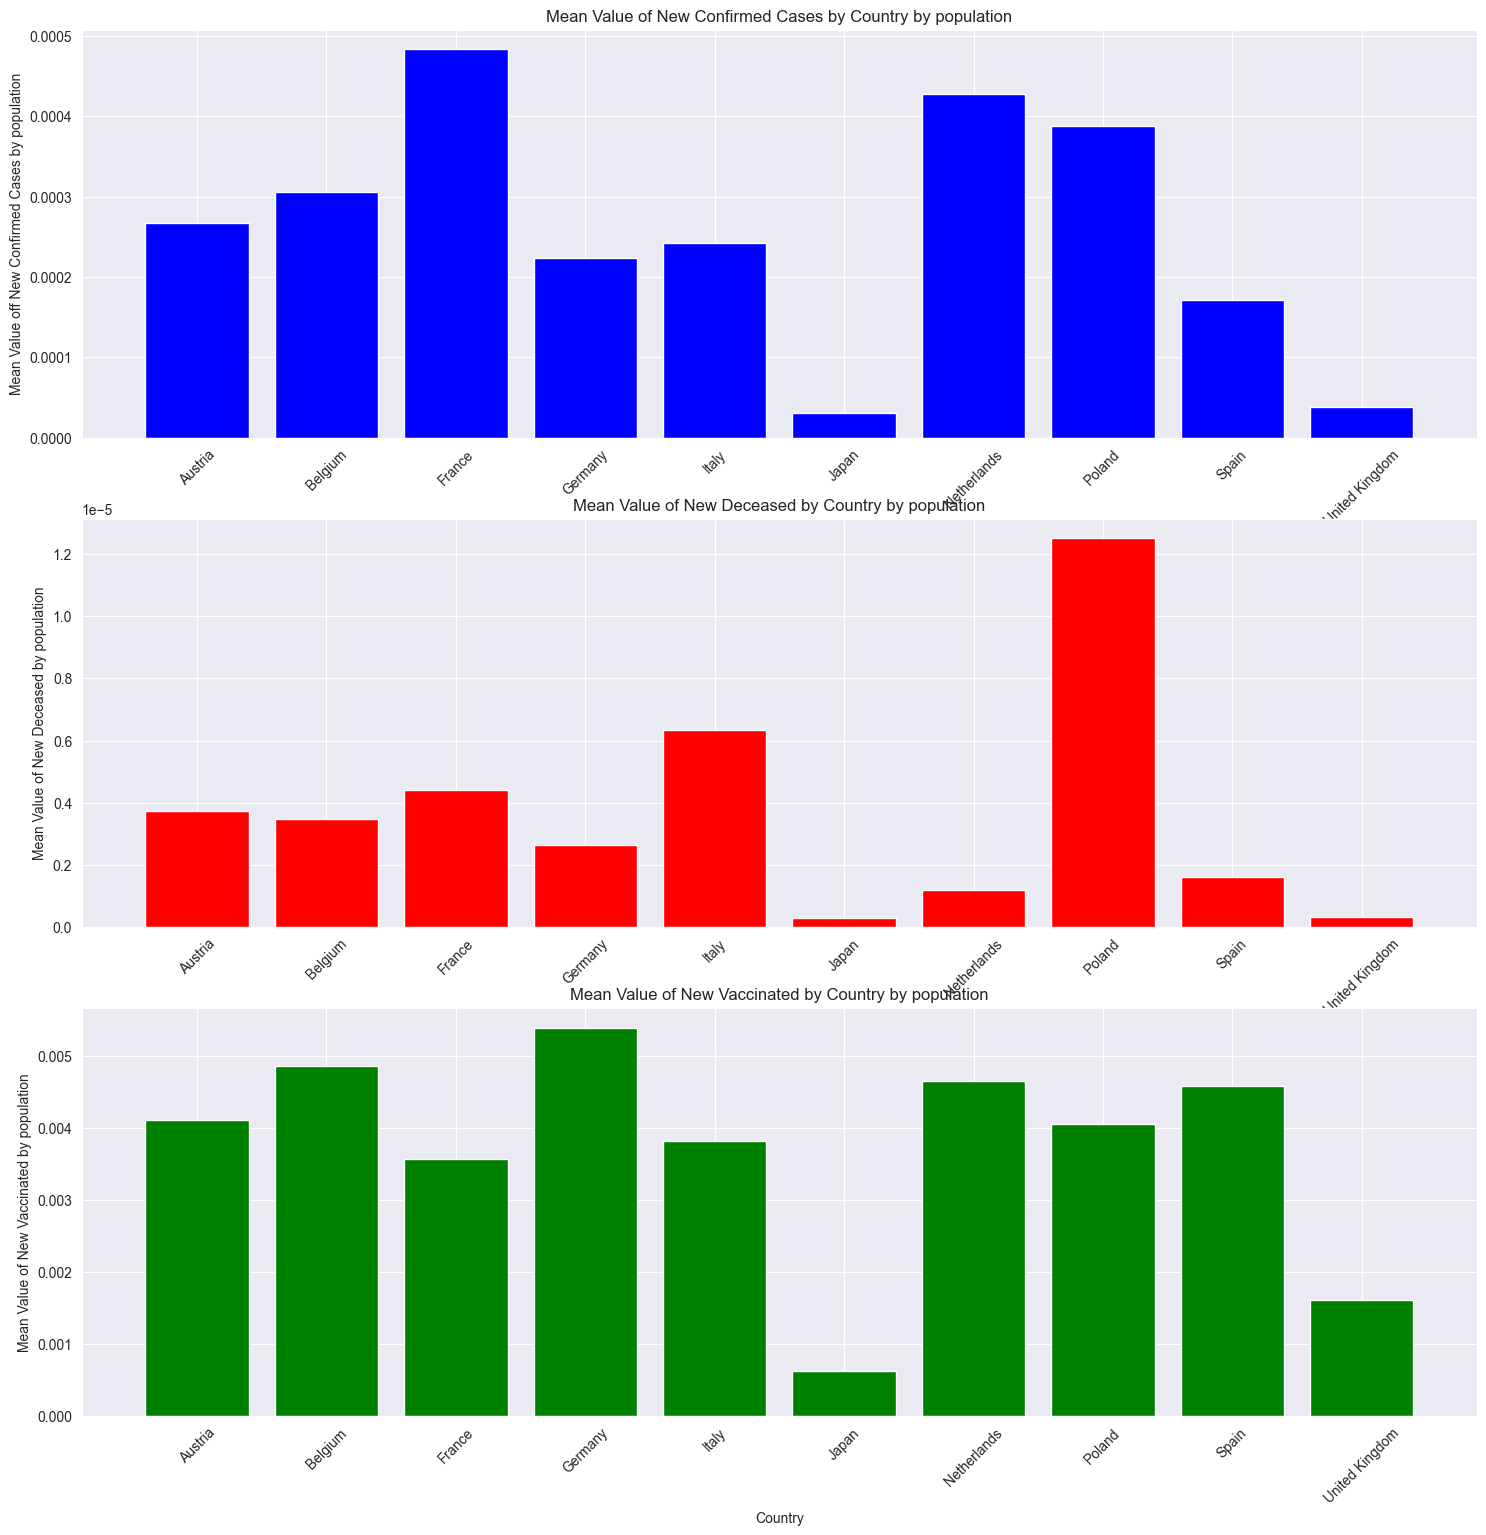

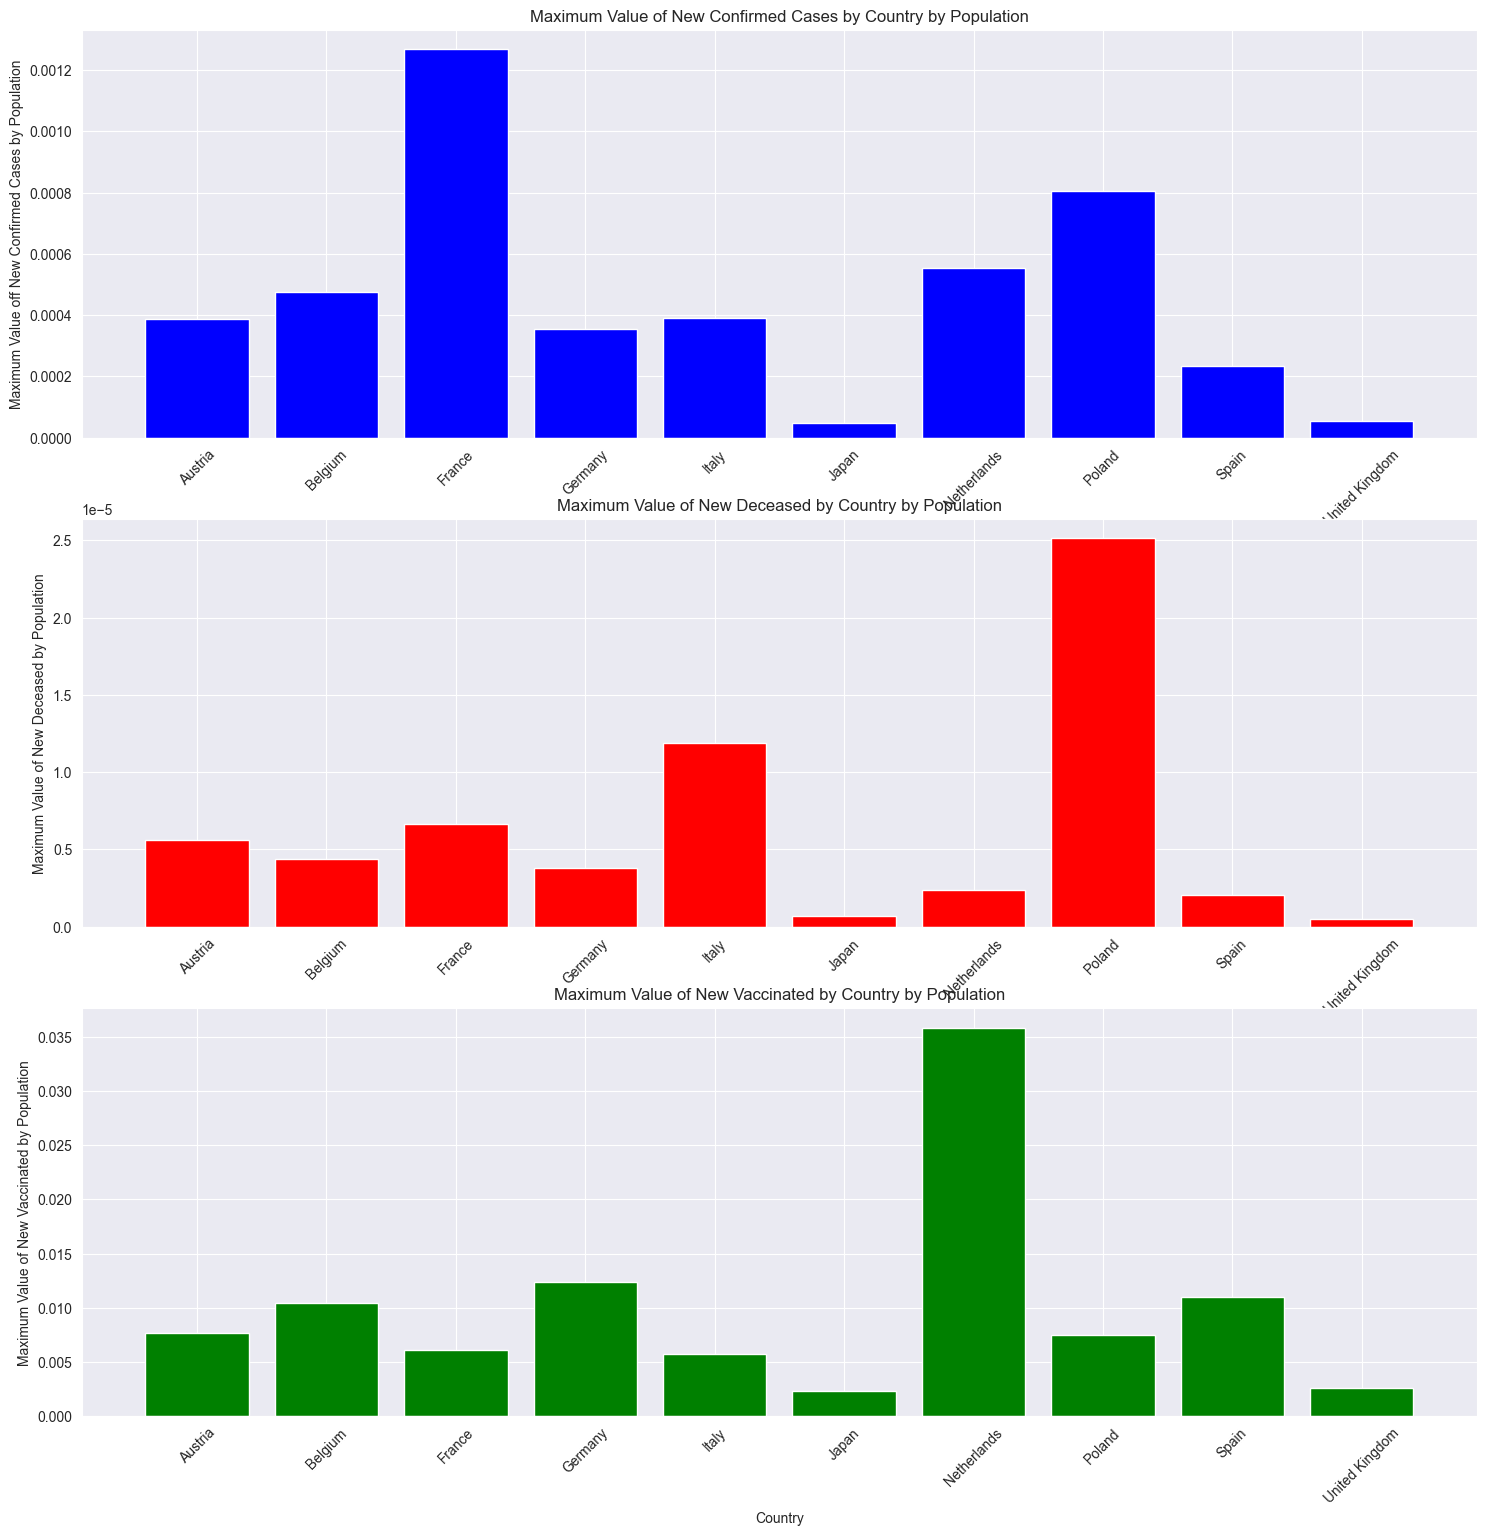

In [195]:
min_new_confirmed_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].min() / x['population'].mean()))
min_new_vaccinated_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_persons_vaccinated'].min() / x['population'].mean()))
min_new_deceased_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_deceased'].min() / x['population'].mean()))


avg_new_confirmed_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].mean() / x['population'].mean()))
avg_new_vaccinated_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_persons_vaccinated'].mean() / x['population'].mean()))
avg_new_deceased_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_deceased'].mean() / x['population'].mean()))


max_new_confirmed_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_confirmed'].max() / x['population'].mean()))
max_new_deceased_by_country_by_pop = df_miesiac.groupby('country_name',group_keys=False ).apply(lambda x: (x['new_deceased'].max() / x['population'].mean()))
max_new_vaccinated_by_country_by_pop = df_miesiac.groupby('country_name', group_keys=False).apply(lambda x: (x['new_persons_vaccinated'].max() / x['population'].mean()))

plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
plt.bar(countries, min_new_confirmed_by_country_by_pop, color='blue')
plt.title('Minimum Value of New Confirmed Cases by Country by population')
plt.xlabel('Country')
plt.ylabel('Minimum Value off New Confirmed Cases by population')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.bar(countries, min_new_deceased_by_country_by_pop, color='red')
plt.title('Minimum Value of New Deceased by Country by population')
plt.xlabel('Country')
plt.ylabel('Minimum Value of New Deceased by population')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.bar(countries, min_new_vaccinated_by_country_by_pop, color='green')
plt.title('Minimum Value of New Vaccinated by Country by population')
plt.xlabel('Country')
plt.ylabel('Minimum Value of New Vaccinated by population')
plt.xticks(rotation=45)

plt.show()


plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
plt.bar(countries, avg_new_confirmed_by_country_by_pop, color='blue')
plt.title('Mean Value of New Confirmed Cases by Country by population')
plt.xlabel('Country')
plt.ylabel('Mean Value off New Confirmed Cases by population')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.bar(countries, avg_new_deceased_by_country_by_pop, color='red')
plt.title('Mean Value of New Deceased by Country by population')
plt.xlabel('Country')
plt.ylabel('Mean Value of New Deceased by population')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.bar(countries, avg_new_vaccinated_by_country_by_pop, color='green')
plt.title('Mean Value of New Vaccinated by Country by population')
plt.xlabel('Country')
plt.ylabel('Mean Value of New Vaccinated by population')
plt.xticks(rotation=45)

plt.show()


plt.figure(figsize=(18, 18))

plt.subplot(3, 1, 1)
plt.bar(countries, max_new_confirmed_by_country_by_pop, color='blue')
plt.title('Maximum Value of New Confirmed Cases by Country by Population')
plt.xlabel('Country')
plt.ylabel('Maximum Value off New Confirmed Cases by Population')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.bar(countries, max_new_deceased_by_country_by_pop, color='red')
plt.title('Maximum Value of New Deceased by Country by Population')
plt.xlabel('Country')
plt.ylabel('Maximum Value of New Deceased by Population')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.bar(countries, max_new_vaccinated_by_country_by_pop, color='green')
plt.title('Maximum Value of New Vaccinated by Country by Population')
plt.xlabel('Country')
plt.ylabel('Maximum Value of New Vaccinated by Population')
plt.xticks(rotation=45)

plt.show()


## Część czwarta.

In [60]:
df2

,country_code,country_name,current_population,population_density,area_sq_km,current_gdp_usd,Rank,Capital,Continent,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Growth Rate,World Population Percentage
0,AFG,Afghanistan,38928341,59.6270,652860,19101353832,37,Kabul,Asia,38972230,33753499,28189672,19542982,10694796,12486631,10752971,1.0257,0.52
1,ALB,Albania,2862427,99.6000,28750,15278077446,140,Tirana,Europe,2866849,2882481,2913399,3182021,3295066,2941651,2324731,0.9957,0.04
2,DZA,Algeria,43851043,18.4110,2381740,169988236398,33,Algiers,Africa,43451666,39543154,35856344,30774621,25518074,18739378,13795915,1.0164,0.56
3,ASM,American Samoa,55197,275.9850,200,636000000,210,Pago Pago,Oceania,46189,51368,54849,58230,47818,32886,27075,0.9831,0.00
4,AND,Andorra,77265,164.3940,470,3154057987,203,Andorra la Vella,Europe,77700,71746,71519,66097,53569,35611,19860,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,WLF,Wallis and Futuna,11246,80.3290,274,0,226,Mata-Utu,Oceania,11655,12182,13142,14723,13454,11315,9377,0.9953,0.00
230,ESH,Western Sahara,575986,2.1654,266000,0,171,El Aaiún,Africa,556048,491824,413296,270375,178529,116775,76371,1.0184,0.01
231,YEM,Yemen,29825968,56.4920,527970,27591261663,47,Sanaa,Asia,32284046,28516545,24743946,18628700,13375121,9204938,6843607,1.0217,0.42
232,ZMB,Zambia,18383956,24.7300,752610,23064722446,64,Lusaka,Africa,18927715,16248230,13792086,9891136,7686401,5720438,4281671,1.0280,0.25


In [61]:
df_normalized = df.copy()
df_normalized = df_normalized.merge(df2[['country_name', 'current_gdp_usd']], left_on='country_name', right_on='country_name')
df_normalized

,date,country_name,new_confirmed,cumulative_confirmed,new_deceased,cumulative_persons_vaccinated,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_persons_fully_vaccinated,vaccination_rate,population,population_density,fatality_rate,cumulative_deceased,current_gdp_usd
0,2020-01-01,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0,19101353832
1,2020-01-02,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0,19101353832
2,2020-01-03,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0,19101353832
3,2020-01-04,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0,19101353832
4,2020-01-05,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0,19101353832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225943,2022-09-13,Zimbabwe,0,256939,0,0,0,0,0,0.0,14862927,38.420,0.037651,5596,21440758800
225944,2022-09-14,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0,21440758800
225945,2022-09-15,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0,21440758800
225946,2022-09-16,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0,21440758800


In [54]:
df_normalized

,date,country_name,new_confirmed,cumulative_confirmed,new_deceased,cumulative_persons_vaccinated,new_persons_vaccinated,cumulative_persons_fully_vaccinated,new_persons_fully_vaccinated,vaccination_rate,population,population_density,fatality_rate,cumulative_deceased
0,2020-01-01,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
1,2020-01-02,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
2,2020-01-03,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
3,2020-01-04,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
4,2020-01-05,Afghanistan,0,0,0,0,0,0,0,0.0,38928341,59.627,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228916,2022-09-13,Zimbabwe,0,256939,0,0,0,0,0,0.0,14862927,38.420,0.037651,5596
228917,2022-09-14,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0
228918,2022-09-15,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0
228919,2022-09-16,Zimbabwe,0,0,0,0,0,0,0,0.0,14862927,38.420,0.000000,0


### 4.1 Liczba zachorowań na 1000 osób

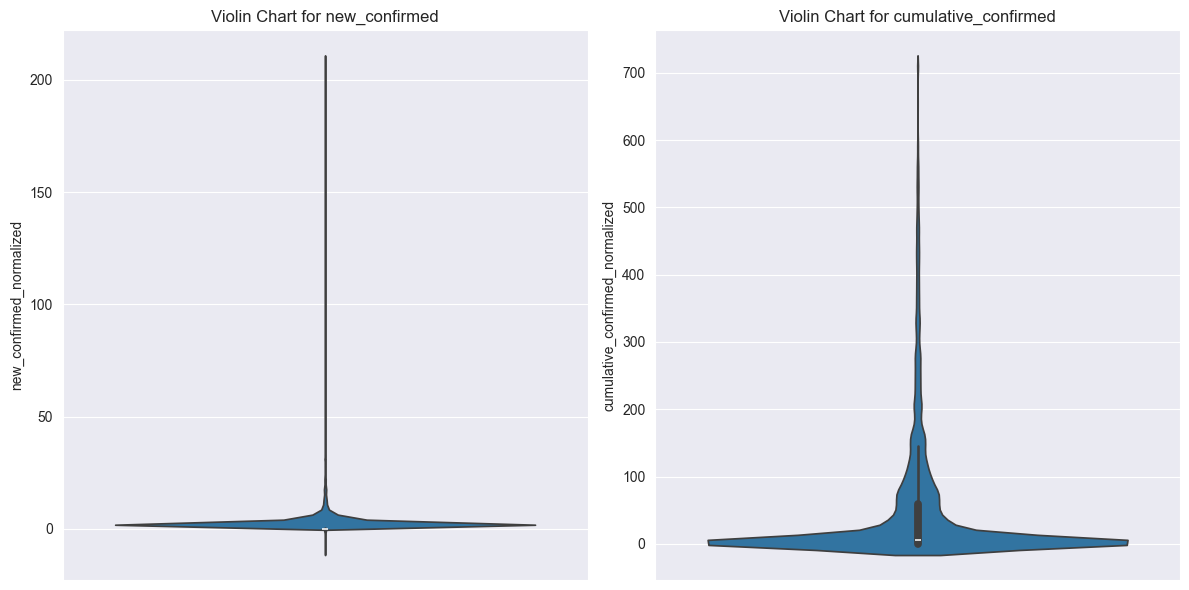

In [198]:
df_normalized["new_confirmed_normalized"] = df_normalized["new_confirmed"] / df_normalized["population"] * 1000
df_normalized["cumulative_confirmed_normalized"] = df_normalized["cumulative_confirmed"] / df_normalized["population"] * 1000

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First violin chart
sns.violinplot(y='new_confirmed_normalized', data=df_normalized, ax=axes[0])
axes[0].set_title('Violin Chart for new_confirmed')

# Second violin chart
sns.violinplot(y='cumulative_confirmed_normalized', data=df_normalized, ax=axes[1])
axes[1].set_title('Violin Chart for cumulative_confirmed')

# Adjust layout
plt.tight_layout()
plt.show()

### 4.2 Liczba szczepień na 1000 osób

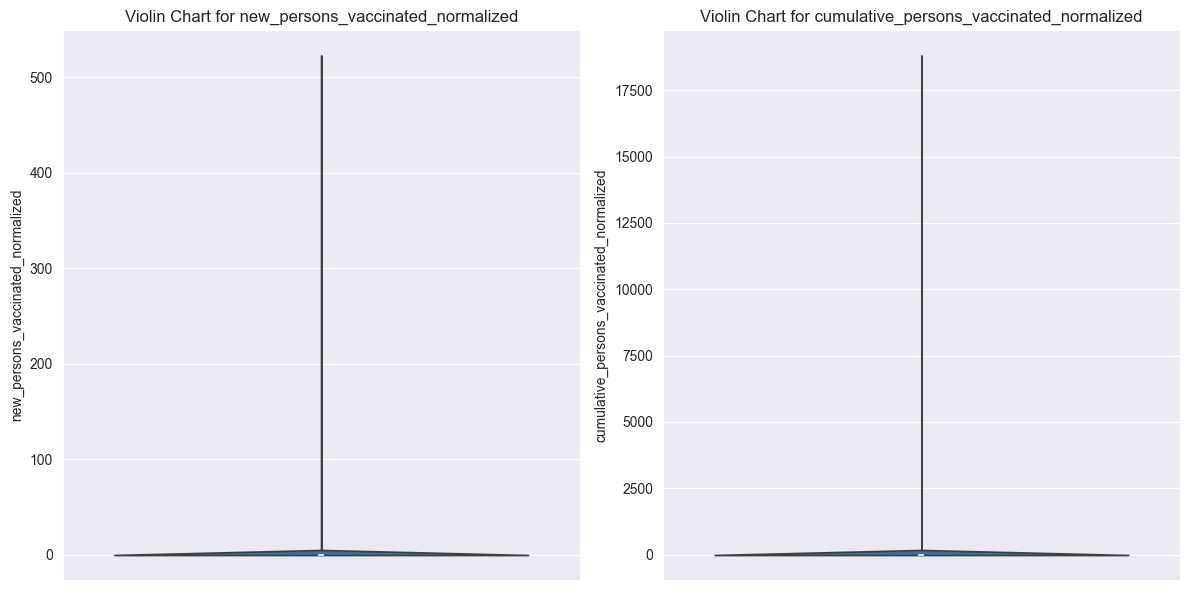

In [201]:
df_normalized["new_persons_vaccinated_normalized"] = (df_normalized["new_persons_vaccinated"] / df_normalized["population"]) * 1000
df_normalized["cumulative_persons_vaccinated_normalized"] = (df_normalized["cumulative_persons_vaccinated"] / df_normalized["population"]) * 1000

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First violin chart
sns.violinplot(y='new_persons_vaccinated_normalized', data=df_normalized, ax=axes[0])
axes[0].set_title('Violin Chart for new_persons_vaccinated_normalized')

# Second violin chart
sns.violinplot(y='cumulative_persons_vaccinated_normalized', data=df_normalized, ax=axes[1])
axes[1].set_title('Violin Chart for cumulative_persons_vaccinated_normalized')

# Adjust layout
plt.tight_layout()
plt.show()

### 4.3 Liczba zgonów na 1000 osób

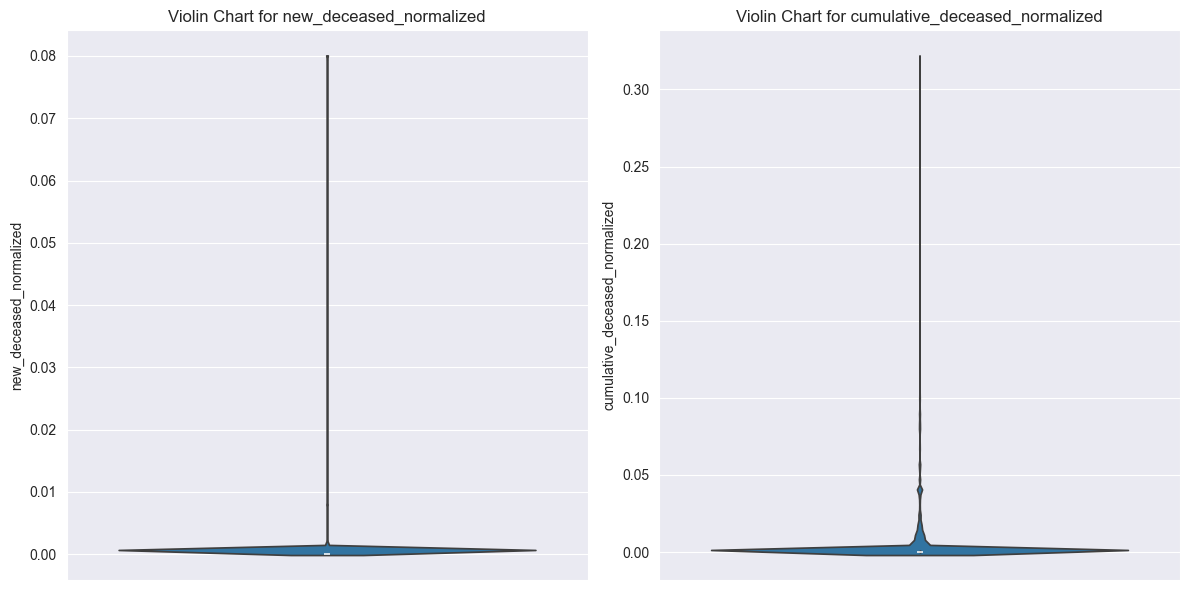

In [202]:
df_normalized["new_deceased_normalized"] = (df_normalized["new_deceased"] / df_normalized["population"]) * 1000
df_normalized["cumulative_deceased_normalized"] = (df_normalized["cumulative_deceased"] / df_normalized["population"]) * 1000

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First violin chart
sns.violinplot(y='new_deceased_normalized', data=df_normalized, ax=axes[0])
axes[0].set_title('Violin Chart for new_deceased_normalized')

# Second violin chart
sns.violinplot(y='cumulative_deceased_normalized', data=df_normalized, ax=axes[1])
axes[1].set_title('Violin Chart for cumulative_deceased_normalized')

# Adjust layout
plt.tight_layout()
plt.show()

### 4.4.1

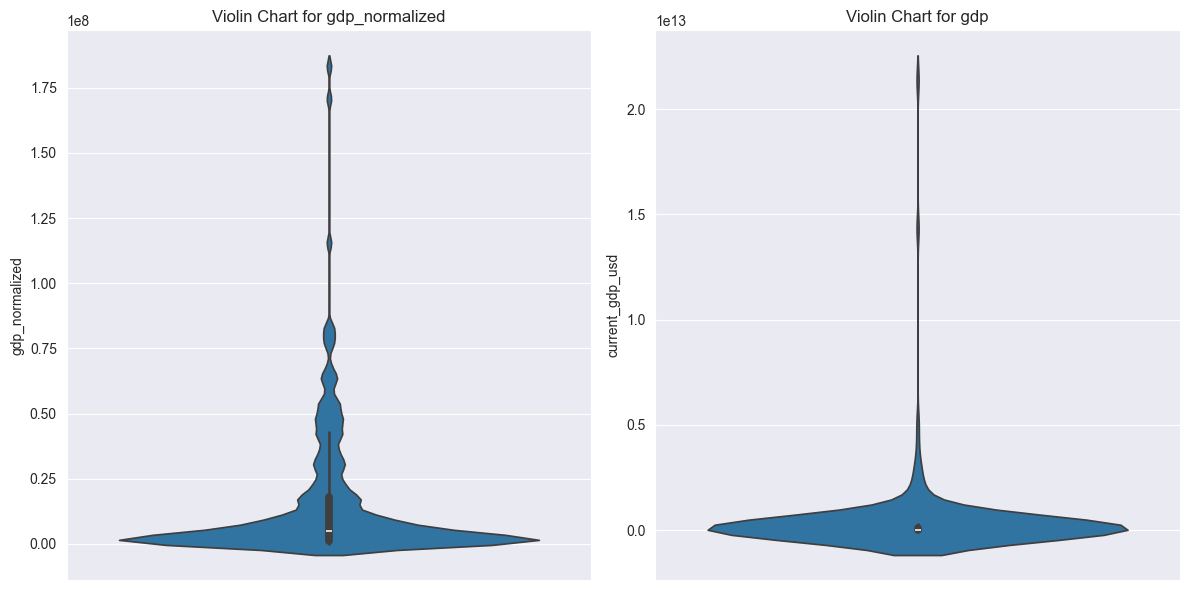

In [63]:
df_normalized["gdp_normalized"] = (df_normalized["current_gdp_usd"] / df_normalized["population"]) * 1000

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(y='gdp_normalized', data=df_normalized, ax=axes[0])
axes[0].set_title('Violin Chart for gdp_normalized')

sns.violinplot(y='current_gdp_usd', data=df2, ax=axes[1])
axes[1].set_title('Violin Chart for gdp')


plt.tight_layout()
plt.show()

### 4.4.2

### 4.4.3

### 4.4.4

## Część piąta.

In [ ]:
def show_corr_matrix(df, cols, title):
    corr = df[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title(title)
    plt.show()

cols_5_1 = ["new_confirmed", "new_persons_vaccinated", "new_deceased"]
show_corr_matrix(df, cols_5_1, "Korelacja: Nowe przypadki, szczepienia i zgony")

cols_5_2 = ["new_confirmed", "new_persons_vaccinated", "new_deceased","cumulative_confirmed",
            "cumulative_persons_fully_vaccinated", "cumulative_deceased"]
show_corr_matrix(df, cols_5_2, "Korelacja: Nowe vs Łączne przypadki, szczepienia, zgony")

cols_5_3 = ["gdp_per_capita_usd", "human_development_index", "new_confirmed", "new_persons_vaccinated", "new_deceased"]
show_corr_matrix(df3, cols_5_3, "Korelacja: Wskaźniki gospodarcze vs nowe przypadki, szczepienia i zgony")

cols_5_4 = ["population", "population_urban", "population_density", "new_confirmed", "new_persons_vaccinated", "new_deceased"]
show_corr_matrix(df3, cols_5_4, "Korelacja: Parametry demograficzne vs nowe przypadki, szczepienia i zgony")

cols_5_5 = ['population', "new_confirmed", "new_persons_vaccinated", "new_deceased"]
show_corr_matrix(df3, cols_5_5, "Korelacja: Gęstość zaludnienia vs nowe przypadki, szczepienia i zgony")

cols_5_6 = ["new_confirmed", "new_persons_vaccinated", "new_deceased", "population_density"]
show_corr_matrix(df3, cols_5_6, "Korelacja: nowe przypadki, szczepienia i zgony vs Gęstość zaludnienia")

cols_5_7= ["human_development_index", "new_confirmed", "new_persons_vaccinated", "new_deceased"]
show_corr_matrix(df3, cols_5_7, "Korelacja: HDI vs nowe przypadki, szczepienia i zgony")

cols_5_8= ['gdp_usd', "new_confirmed", "new_persons_vaccinated", "new_deceased"]
show_corr_matrix(df3, cols_5_8, "Korelacja: PKB vs nowe przypadki, szczepienia i zgony")

